# Анализ вакансий DA и DS 
Данный проект направлен на __анализ вакансий DA и DS__ на основе данных портала HH.ru  

Целью данного проекта является выявление различий в предлагаемых вакансиях для
Аналитиков данных и Специалистов по Data Science.  

Задачи проекта:
1. Предобработка данных
2. Исследовательский анализ
3. Выявление грейда требуемых специалистов по названию вакансии или по колонке с требуемым опытом.
4. Определение доли грейдов Junior, Junior+, Middle, Senior среди вакансий Аналитик данных и Бизнес-аналитик
5. Определение типичного места работы для Аналитика данных и Бизнес-аналитика по следующим параметрам:  
       ТОП-работодателей по числу вакансий, зарплата, тип занятости, график работы (отдельно для грейдов Junior, Juniort, Middle, Senior).
6. Определение, какие навыки спрашивают чаще - твердые или мягкие. К какому грейду и к какой специальности требований больше.
7. Определение наиболее желаемых кандидатов на вакансии Аналитик данных и Бизнес-аналитик по следующим параметрам: самые важные hard-skils, самые важные soft-skils. 
8. Расчет помесячной динамики количества вакансий для Аналитика данных и Бизнес-аналитика. 
9. Формулирование выводов и рекомендаций.
       

Презентация:
https://disk.yandex.ru/i/GE5PF71MGUqv_A

## Исходные данные

In [1]:
# Подключаем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Введем исходные данные
dt_da = pd.read_excel('vacancies_da.xlsx')
# dt_da = dt_da.droplevel(1)
dt_ds = pd.read_excel('vacancies_ds.xlsx')

In [3]:
# Проверим правильность чтения
dt_da.head()


,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
0,100039284,Junior аналитик данных (исследователь),2024-05-24 09:37:04,https://hh.ru/vacancy/100039284,Открытая,DNS Головной офис,NaN,Владивосток,Junior (no experince),"['Power BI', 'СУБД', 'Python', 'SQL']",Полный день,Полная занятость,наше направление занимается повышением эффекти...,наш направление заниматься повышение эффективн...,60000.0,NaN,ЗП не указана,"SQL, Power BI, Python, СУБД",NaN,NaN
1,100039480,Аналитик данных,2024-05-24 09:39:00,https://hh.ru/vacancy/100039480,Открытая,Комус,NaN,Москва,Junior (no experince),"['MS SQL', 'Работа с базами данных', 'MS Excel']",Полный день,Полная занятость,сегодня комус один из крупнейших поставщиков о...,сегодня комус крупный поставщик офисный товар ...,NaN,NaN,ЗП не указана,"Работа с базами данных, MS SQL, MS Excel",NaN,NaN
2,100042705,Аналитик данных (исследователь),2024-05-24 10:01:25,https://hh.ru/vacancy/100042705,Открытая,DNS Головной офис,NaN,Владивосток,Junior+ (1-3 years),"['SQL', 'Power BI', 'СУБД', 'Python', 'Clickho...",Полный день,Полная занятость,наше направление занимается повышением эффекти...,наш направление заниматься повышение эффективн...,90000.0,NaN,ЗП не указана,"SQL, Power BI, Python, СУБД, BPMN, Clickhouse",NaN,NaN
3,100046788,Ведущий аналитик данных,2024-05-24 10:28:18,https://hh.ru/vacancy/100046788,Открытая,Х5 Group,"X5 GROUP, Центральный офис",Москва,Junior+ (1-3 years),"['Анализ данных', 'Коммуникация', 'SQL', 'MS O...",Полный день,Полная занятость,задачи: разработка бизнес-моделей для группов...,задача разработка бизнес модель групповой прог...,NaN,NaN,ЗП не указана,"MS Office, SQL, Python, Hadoop, Нive, Аналитич...","Pandas, Юнит-экономика",Коммуникация
4,100056244,Аналитик данных,2024-05-24 11:27:40,https://hh.ru/vacancy/100056244,Открытая,ЛУКОЙЛ,NaN,Москва,Middle (3-6 years),['Документация'],Полный день,Полная занятость,"обязанности: участие в проектировании, разраб...",обязанность участие проектирование разработка ...,NaN,NaN,ЗП не указана,NaN,NaN,Документация


In [4]:
dt_ds.head(15)

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
0,100049339,Стажер Data Science (Новосибирск),2024-05-24 10:44:01,https://hh.ru/vacancy/100049339,Открытая,СБЕР,Сбер для экспертов,Новосибирск,Junior (no experince),[],Полный день,Стажировка,sberseasons - оплачиваемая программа стажирово...,sberseasons оплачивать программа стажировка ра...,NaN,NaN,ЗП не указана,NaN,NaN,NaN
1,100051447,Data Scientist,2024-05-24 10:58:18,https://hh.ru/vacancy/100051447,Открытая,Бюро кредитных историй Скоринг Бюро,NaN,Москва,Junior+ (1-3 years),"['Python', 'Hadoop', 'Machine Learning', 'Рабо...",Удаленная работа,Полная занятость,бюро кредитных историй «скоринг бюро» является...,бюро кредитный история скоринг бюро являться к...,NaN,NaN,ЗП не указана,"SQL, MS SQL, Big Data, Python, Spark, Hadoop, ...",Pandas,"Документация, Аналитическое мышление"
2,100070495,ML Engineer / Data Scientist,2024-05-24 13:15:26,https://hh.ru/vacancy/100070495,Открытая,ГК ФСК,NaN,Москва,Junior+ (1-3 years),"['Python', 'PyTorch', 'Machine Learning', 'Doc...",Полный день,Полная занятость,о компании и команде: группа компаний фск – мн...,компания команда группа компания фск многопроф...,NaN,NaN,ЗП не указана,"Python, PyTorch, ML, Docker, NLP, Pandas, SQL,...",NaN,NaN
3,100076648,Team Lead Data Science,2024-05-24 14:07:00,https://hh.ru/vacancy/100076648,Открытая,СБЕР,Сбер для экспертов,Москва,Middle (3-6 years),[],Полный день,Полная занятость,наша команда разрабатывает модели машинного об...,наш команда разрабатывать модель машинный обуч...,NaN,NaN,ЗП не указана,NaN,NaN,NaN
4,100077910,Data Analyst / Data Scientist,2024-06-08 14:17:47,https://hh.ru/vacancy/100077910,Открытая,Итсен,NaN,Москва,Middle (3-6 years),"['DataLens', 'MS SQL', 'SQL', 'Spark', 'Аналит...",Полный день,Полная занятость,мы ищем талантливого middle data analyst / dat...,искать талантливый middle data analyst data sc...,350000.0,NaN,ЗП не указана,"Python, SQL, Обучение и развитие, Data Mining,...",NaN,Аналитическое мышление
5,100079219,Senior Data Scientist MLE,2024-06-08 14:29:15,https://hh.ru/vacancy/100079219,Открытая,Автомакон,NaN,Москва,Middle (3-6 years),"['Python', 'sklearn', 'PostgreSQL', 'numpy', '...",Удаленная работа,Полная занятость,обязанности: собирать данные из dwh; эксперим...,обязанность собирать данные dwh экспериментиро...,300000.0,450000.0,Больше 300 тысяч,"ml, Python, numpy, scipy, pandas, sklearn, Cli...",Pandas,Документация
6,100088790,Data Scientist,2024-05-24 15:44:41,https://hh.ru/vacancy/100088790,Открытая,Ростелеком,NaN,Санкт-Петербург,Junior+ (1-3 years),"['Python', 'Machine Learning', 'SQL', 'Big Dat...",Удаленная работа,Полная занятость,"привет, будущий заклинатель данных! хочешь при...",привет будущий заклинатель данные хотеть присо...,NaN,NaN,ЗП не указана,"Python, Big Data, SQL, Machine Learning, Git",Pandas,NaN
7,100094269,Middle/Senior Data Scientist (LLM),2024-05-24 16:33:00,https://hh.ru/vacancy/100094269,Открытая,СБЕР,Сбер для экспертов,Москва,Middle (3-6 years),[],Полный день,Полная занятость,ищем senior\middle+ data scientist в команду s...,искать senior middle data scientist команда sb...,NaN,NaN,ЗП не указана,NaN,NaN,NaN
8,100096283,Эксперт Data Science,2024-05-24 16:56:18,https://hh.ru/vacancy/100096283,Открытая,МТС Финтех,МТС Банк. Головной офис,Москва,Junior+ (1-3 years),"['Python', 'Документация', 'SQL']",Полный день,Полная занятость,мтс финтех – одно из ключевых направлений разв...,мтс финтех ключевой направление развитие групп...,NaN,NaN,ЗП не указана,"Python, SQL",NaN,Документация
9,100096836,Data Scientist/Data miner,2024-05-24 17:01:31,https://hh.ru/vacancy/100096836,Открытая,Интерлизинг,NaN,Санкт-Петербург,Junior+ (1-3 years),"['Python', 'Работа с базами данных', 'Статисти...",Полный день,Полная занятость,интерлизинг – федеральная лизинговая к

In [5]:
#  объединим таблицы в одну
dt = pd.concat([dt_ds,dt_da],axis=0)
dt_ish = dt.copy()
# сравним длину получившейся таблицы с суммой длин исходных 
display(len(dt_da)+len(dt_ds), len(dt))


2775

2775

Описание полей в данных
- id - Уникальный идентификатор вакансии.
- name - Название вакансии.
- published_at - Дата публикации.
- alternate_url - Ссылка на вакансию.
- type - Статус вакансии на момент получения данных от api и передачи
их в базу.
- employer - Работодатель.
- department - Работодатель, отдел.
- area - Регион места работы.
- experience - Требуемый опыт работы.
- key_skills - Ключевые навыки, в том числе найденные при анализе
полного текста вакансии. Поле генерируется после получения
информации от api.
- schedule - График работы.
- employment - Тип занятости.
- description - Описание вакансии.
- description_lemmatized - Лемматизированное описание вакансии.
- salary_from - Нижняя граница предлагаемой заработной платы.
- salary_to - Верхняя граница предлагаемой заработной платы.
- salary_bin - Категория зарплаты.
- key_skills_from_key_skills_field - Ключевые навыки из поля вакансии
key_skills.
- hard_skills_from_description - “Твердые” навыки, найденные при
обработке полей с навыками. Поле генерируется после получения
информации от api. soft_skills_from_description - “Мягкие” навыки,
найденные при обработке полей с навыками. Поле генерируется после
получения информации от api.

## Предобработка данных

Этап предобработки данных включает в себя:
- проверка типов данных
- проверка пропусков и их заполнение по возможности 
- проверка явных и неявных дубликатов


### Проверка типов данных и переименование стобцов

In [6]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2775 entries, 0 to 1800
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                2775 non-null   int64         
 1   name                              2775 non-null   object        
 2   published_at                      2775 non-null   datetime64[ns]
 3   alternate_url                     2775 non-null   object        
 4   type                              2775 non-null   object        
 5   employer                          2775 non-null   object        
 6   department                        934 non-null    object        
 7   area                              2775 non-null   object        
 8   experience                        2775 non-null   object        
 9   key_skills                        2775 non-null   object        
 10  schedule                          2775 non-null   obj

In [7]:
# Удалим стобец key_skills т.к. он дублируется в последущем столбце
# del dt['key_skills']
# Для дальнейшего удобства переименуем некоторые из стобцов
dt = dt.rename(columns={"key_skills":"skills",
                      "key_skills_from_key_skills_field": "key_skills",
                      "hard_skills_from_description": "hard_skills",
                      "soft_skills_from_description": "soft_skills"})
dt.columns

Index(['id', 'name', 'published_at', 'alternate_url', 'type', 'employer',
       'department', 'area', 'experience', 'skills', 'schedule', 'employment',
       'description', 'description_lemmatized', 'salary_from', 'salary_to',
       'salary_bin', 'key_skills', 'hard_skills', 'soft_skills'],
      dtype='object')

### Обработка дубликатов

In [8]:
# Поиск полных дуюликатов
dt.duplicated().sum() 

27

In [9]:
# Удаление полных дубликатов
dt = dt.drop_duplicates()

In [10]:
# Поиск явных дубликатов по полю ссылки на вакансию и столбцами, связанными с зп
dt.duplicated(subset='alternate_url').sum() 

27

In [11]:
# возможно некоторые из дубликатов по ссылкам на вакансию содержат больше или меньше полезных данных
# поэтому предалается создать столбец с количеством пропусков в строке, по которому в дальнейшем и будет 
# происходить обработка

# Кустарная функция для подсчета нулевых значений
def count_nan(list):
    k=0
    for i in list:
        if pd.isna(i) == True:
            k = k+1
    return(k)
            
# посчитаем количество пропусков в строках
dt['count_of_nan'] = dt.apply(count_nan, axis=1)
# отсортируем данные сначала по ссылке на вакансию, потом по количеству пропусков по возрастанию
dt = dt.sort_values(by=['alternate_url','count_of_nan'])
# удалим дубликаты с большим кол-вом пропусков
dt = dt.drop_duplicates(subset='alternate_url').reset_index(drop=True)
# удалим столбец с количеством пропусков
del dt['count_of_nan']

In [12]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2721 entries, 0 to 2720
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      2721 non-null   int64         
 1   name                    2721 non-null   object        
 2   published_at            2721 non-null   datetime64[ns]
 3   alternate_url           2721 non-null   object        
 4   type                    2721 non-null   object        
 5   employer                2721 non-null   object        
 6   department              922 non-null    object        
 7   area                    2721 non-null   object        
 8   experience              2721 non-null   object        
 9   skills                  2721 non-null   object        
 10  schedule                2721 non-null   object        
 11  employment              2721 non-null   object        
 12  description             2721 non-null   object  

In [13]:
a = (len(dt_ish)-len(dt))*100/(len(dt_ish))
b = round(a,1)
print('После удаления явных дубликатов исходный датафрейм сократился на',b,'%')

После удаления явных дубликатов исходный датафрейм сократился на 1.9 %


***

In [14]:
# проверим уникальные значения в столбцах для исключения неявных дубликатов
# предварительно зададим нижный регистр
dt['name'] = dt['name'].str.lower()
# выведем количество уникальных значений
print(len(dt['name'].unique()))
# заменим различные названия вакансий на 2: Data Analyst и Data Scientist
def rename_name(i):
    if 'аналитик данных' in i:
        return('Data Analyst')
    if 'data scientist' in i:
        return('Data Scientist')   
# применем функцию 
dt['name'] = dt['name'].apply(rename_name)
# выведем список уникальных значений
print(dt['name'].unique())
# удалим все строки с нулевым значением
dt = dt.loc[pd.isna(dt['name']) == False]

1156
['Data Analyst' None 'Data Scientist']


***

In [15]:
# проверим столбец type
i = 'type'
# предварительно зададим нижный регистр
dt[i] = dt[i].str.lower()
# выведем количество уникальных значений
print(len(dt[i].unique()))


1


In [16]:
# В данном столбце всего одно уникальное значение, 
# для дальнейшего анализа данных столбец не принесет пользы
# удалим его
del dt['type']

***

In [17]:
# проверим столбец employer
i = 'employer'
# предварительно зададим нижный регистр
dt[i] = dt[i].str.lower()
# выведем количество уникальных значений
print(dt[i].unique())

['dns головной офис' 'комус' 'х5 group'
 'бюро кредитных историй скоринг бюро' 'лукойл'
 'гку центр занятости населения города москвы' 'мтс' 'гк фск'
 'россети урал' 'итсен' 'автомакон' 'колл солюшенс' 'ozon' 'ростелеком'
 'кадровый центр департамента здравоохранения города москвы' 'сбер'
 'интерлизинг' 'guruleads' 'ancor' 'северсталь' 'гринатом' 'яндекс'
 'центральный банк российской федерации' 'открытый код' 'okkam' 'терра'
 'гаоу дпо московский центр развития профессионального образования'
 'группа компаний кан авто' 'data acquisition' 'ингосстрах банк'
 'f.a.c.c.t.' 'mgcom' 'эдсолюшн' 'т1' 'элемент лизинг' 'wildberries'
 'экопси консалтинг' 'совкомбанк' 'rambler&co' 'россельхозбанк'
 'эстилаб рус' 'деловые линии' 'samokat.tech' 'sprinthost' 'гку инфогород'
 'магнит, розничная сеть' 'фгбу центр агроаналитики' 'почта банк'
 'x5 tech' 'rubbles' 'мегамаркет' 'райффайзен банк' 'гпм партнер' 'точка'
 'vk' 'сэлвим' 'псб (пао «промсвязьбанк»)' 'diginetica' 'bell integrator'
 'банк втб (пао

будем считать всех работадателей действительно уникальными
***

In [18]:
# проверим столбец department
i = 'department'
# предварительно зададим нижный регистр
dt[i] = dt[i].str.lower()
# выведем количество уникальных значений
print(dt[i].unique())

[nan 'x5 group, центральный офис' '«мтс» ' 'ozon офис и коммерция'
 'сбер для экспертов' 'северсталь. it & digital'
 'гринатом. многофункциональный центр обслуживания. закупки и логистика'
 'яндекс.маркет' 'сбер. it' 'гк иннотех | финтех (иннотех)'
 'ozon информационные технологии' 'яндекс' 'rambler&co'
 'гк иннотех | интеграция консалтинг'
 'почта банк. экспертам и руководителям' 'сбер. data science' 'vk'
 'пао «промсвязьбанк», ит' 'пао втб, подразделения поддержки и контроля'
 'пао «газпром нефть» ит' 'пао втб, технологический блок'
 'альфа-банк. центральный офис' 'пао «газпром нефть» закупки' 'ит'
 'гк иннотех | большие данные' 'лента, федеральная розничная сеть, it '
 'авито тех: разработка' 'билайн: ит, data, digital' 'вкусвилл. офис'
 'гознак. информационные технологии' 'триколор вещание и бэк-офис'
 'газпромбанк' 'тмк++' 'ozon fintech' ' schlumberger. ао икф-сервис. офис'
 'компания «спортмастер», sportmaster lab'
 'московский кредитный банк. профессионалы' 'мегафон, инженерные'

будем считать все департаменты действительно уникальными
****

In [19]:
# проверим столбец area
i = 'area'
# предварительно зададим нижный регистр
dt[i] = dt[i].str.lower()
# выведем количество уникальных значений
print(dt[i].unique())

['владивосток' 'москва' 'казань' 'екатеринбург' 'санкт-петербург' 'самара'
 'новосибирск' 'омск' 'краснодар' 'сочи' 'нижний новгород' 'уфа'
 'нефтекамск' 'курган' 'пермь' 'ижевск' 'чебоксары' 'владимир' 'воронеж'
 'адыгейск' 'балашиха' 'челябинск' 'киров (кировская область)' 'смоленск'
 'калининград' 'тюмень' 'майкоп' 'липецк' 'красноярск' 'горно-алтайск'
 'дзержинский' 'белгород' 'ступино' 'рязань' 'томск'
 'северск (томская область)' 'таганрог' 'артем' 'верхняя пышма'
 'ростов-на-дону' 'щербинка' 'кемерово' 'подольск (московская область)'
 'королев' 'вейделевка' 'химки' 'ульяновск' 'иваново (ивановская область)'
 'луховицы' 'златоуст' 'набережные челны' 'южно-сахалинск' 'тверь'
 'байбек' 'иркутск' 'турочак' 'симферополь' 'вельск' 'алтайское' 'саратов'
 'оренбург' 'псков' 'ярославль' 'великие луки' 'магнитогорск'
 'пушкино (московская область)' 'мытищи' 'тула' 'тамбов' 'тольятти'
 'волгоград' 'дмитров' 'якутск' 'одинцово']


Все города уникальны
***

In [20]:
# проверим столбец experience
i = 'experience'
# выведем уникальные значения
print(dt[i].unique())

['Junior (no experince)' 'Junior+ (1-3 years)' 'Middle (3-6 years)'
 'Senior (6+ years)']


***

In [21]:
# проверим столбец schedule
i = 'schedule'
# выведем уникальные значения
print(dt[i].unique())

['Полный день' 'Удаленная работа' 'Гибкий график' 'Сменный график']


***

In [22]:
# проверим столбец employment
i = 'employment'
# выведем уникальные значения
print(dt[i].unique())

['Полная занятость' 'Стажировка' 'Частичная занятость' 'Проектная работа']


***

In [23]:
# проверим столбец salary_bin
i = 'salary_bin'
# выведем уникальные значения
print(dt[i].unique())

['ЗП не указана' 'Больше 300 тысяч' 'От 100 тысяч до 200 тысяч'
 'Меньше 100 тысяч' 'От 200 тысяч до 300 тысяч']


### Заполнение пропусков

In [24]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2176 entries, 0 to 2720
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      2176 non-null   int64         
 1   name                    2176 non-null   object        
 2   published_at            2176 non-null   datetime64[ns]
 3   alternate_url           2176 non-null   object        
 4   employer                2176 non-null   object        
 5   department              738 non-null    object        
 6   area                    2176 non-null   object        
 7   experience              2176 non-null   object        
 8   skills                  2176 non-null   object        
 9   schedule                2176 non-null   object        
 10  employment              2176 non-null   object        
 11  description             2176 non-null   object        
 12  description_lemmatized  2176 non-null   object       

1. Нулевые ячейки стобца department можем заменить работадателем (в противном случае использовать заглушку - 'неизвестно')

Будем считать указание зарплаты от как бюджет выделенный на данную позицию,    
на основе этого подкоректируем salary_bin

Пропуски и недочеты содержат следующие поля:
- department
- salary_from
- salary_to
- salary_bin
- key_skills
- hard_skills
- soft_skills

In [25]:
# функция для создания простых заглушек
def zag(zag,column,dt=dt):
    def dep(i):
        if pd.isna(i) is True:
            return(zag)
        else:
            return(i)  
            
    dt[column] = dt[column].apply(dep)
    print('Проверка количества пропусков в поле ',column,':',pd.isna(dt[column]).sum())
    return(dt[column])    

In [26]:
# department
# заполним пропуски в данном стобце заглушкой - 'не указано'
dt['department'] = zag('не указано','department')

Проверка количества пропусков в поле  department : 0


In [27]:
# salary_from
# в данном поле нет возможности корректного заполнения пропусков данными
# заполним пропуски в данном стобце заглушкой - '-100'
dt['salary_from'] = zag(-100,'salary_from')

Проверка количества пропусков в поле  salary_from : 0


In [28]:
# salary_to
# в данном поле нет возможности корректного заполнения пропусков данными
# заполним пропуски в данном стобце заглушкой - '-10'
dt['salary_to'] = zag(-10,'salary_to')

Проверка количества пропусков в поле  salary_to : 0


In [29]:
# salary_bin
# заполним пропуски в данном стобце основываясь на столбце salary_from
def moneyfall(i):
    i = i/1000
    if i > 0 and i < 100:
        return('Меньше 100 тысяч')
    if i >= 100 and i < 200:
        return('От 100 тысяч до 200 тысяч')
    if i >= 200 and i < 300:
        return('От 200 тысяч до 300 тысяч')
    if i >= 300:
        return('Больше 300 тысяч')
    else:
        return('ЗП не указана')
dt['salary_bin'] = dt['salary_from'].apply(moneyfall)
print('Проверка количества пропусков в поле salary_bin:',pd.isna(dt['salary_bin']).sum())
        

Проверка количества пропусков в поле salary_bin: 0


In [30]:
# создадим дубль столбца с навыками для дальнейшего анализа
dt['d_key_skills'] = dt['key_skills']
# заполним пропуски в soft_skills
dt['key_skills'] = zag('не указано','key_skills')

Проверка количества пропусков в поле  key_skills : 0


In [31]:
# создадим дубль столбца с навыками для дальнейшего анализа
dt['d_soft_skills'] = dt['soft_skills']
# заполним пропуски в soft_skills
dt['soft_skills'] = zag('не указано','soft_skills')

Проверка количества пропусков в поле  soft_skills : 0


выписать похожие значения и выбрать им одну замену

## Исследовательский анализ данных

In [32]:
# функция для построния гистрограмм
def graf_ik(a,x_lab,c,data=dt,bins=3,xrot=0):
    
    plt.figure(figsize=(7,5))

    plt.hist(data[a],bins=bins)
    plt.xlabel(x_lab)
    plt.ylabel('Количество вакансий')
    plt.xticks(rotation = xrot)
    plt.grid(True)
    plt.title(c)


    plt.show()

In [33]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2176 entries, 0 to 2720
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      2176 non-null   int64         
 1   name                    2176 non-null   object        
 2   published_at            2176 non-null   datetime64[ns]
 3   alternate_url           2176 non-null   object        
 4   employer                2176 non-null   object        
 5   department              2176 non-null   object        
 6   area                    2176 non-null   object        
 7   experience              2176 non-null   object        
 8   skills                  2176 non-null   object        
 9   schedule                2176 non-null   object        
 10  employment              2176 non-null   object        
 11  description             2176 non-null   object        
 12  description_lemmatized  2176 non-null   object       

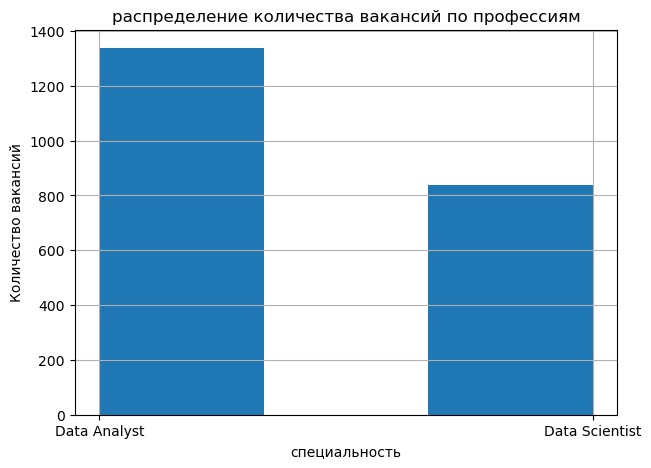

In [34]:
graf_ik('name','специальность','распределение количества вакансий по профессиям')

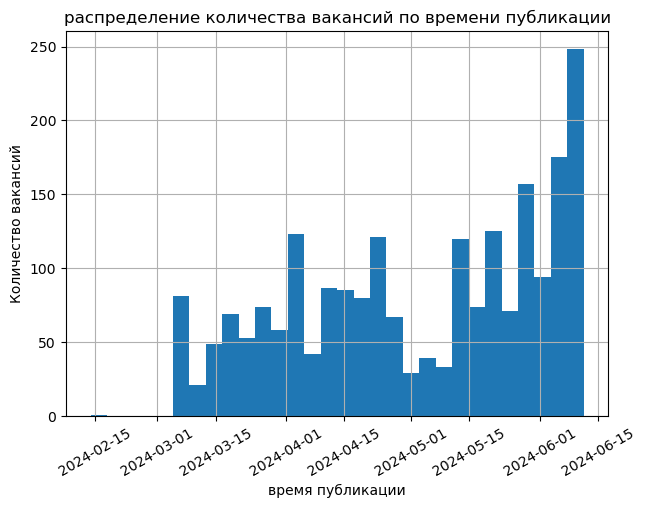

In [35]:
graf_ik('published_at','время публикации','распределение количества вакансий по времени публикации',bins=30,xrot=30)

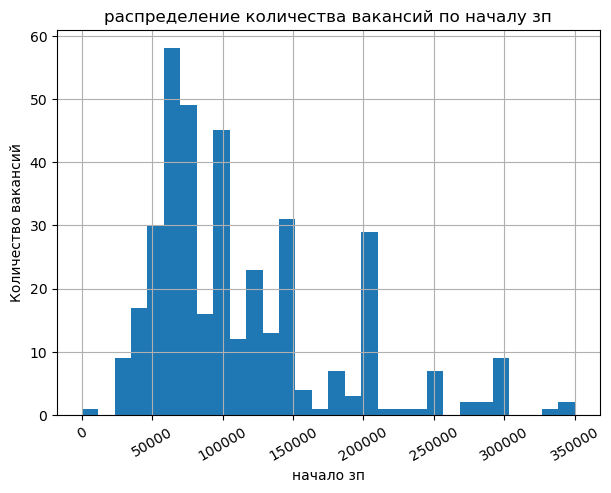

25000.0

In [36]:
# рассмотрим распределения старта вилки зп без учета значений с заглушкой
dt_s = dt.copy()
dt_s['salary_from'] = dt_s.loc[dt_s['salary_from'] > 0,'salary_from']
graf_ik('salary_from','начало зп','распределение количества вакансий по началу зп',bins=30,xrot=30,data=dt_s)
# на графике можно заметить странное значение в 50 рублей
min(dt_s['salary_from'])
# удалим его
min(dt.loc[dt['salary_from'] > 0, 'salary_from'])
dt = dt.drop(dt[dt['salary_from'] == 50].index)
# и проверим новый минимум
min(dt.loc[dt['salary_from'] > 0, 'salary_from'])

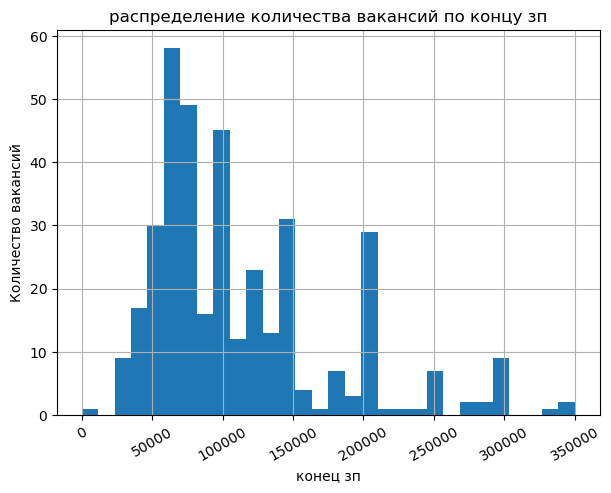

25000.0

In [37]:
# рассмотрим распределения конца вилки зп без учета значений с заглушкой
dt_s['salary_to'] = dt_s.loc[dt_s['salary_to'] > 0,'salary_to']
graf_ik('salary_from','конец зп','распределение количества вакансий по концу зп',bins=30,xrot=30,data=dt_s)
# выбросы в данных не обнаружены
min(dt.loc[dt['salary_to'] > 0, 'salary_to'])

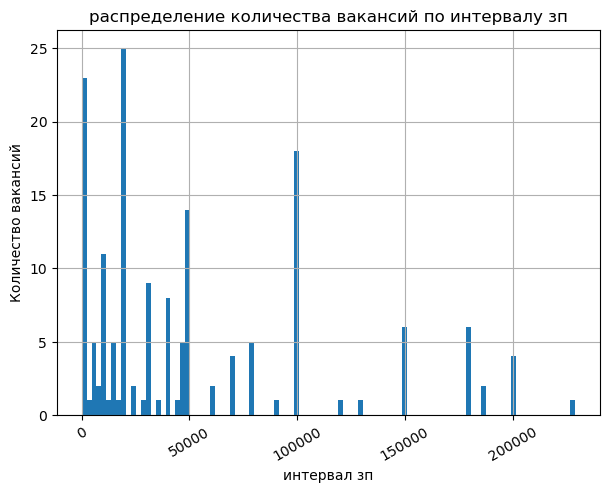

отрицательных значений не обнаружено


In [38]:
# проверим также распределение разниц между начало и концом вилки зп
# создадим для этого новый столбец во вновь созданном датафрейме dt_s(без учета заглушек)
dt_s['salary_int'] = dt_s['salary_to'] - dt_s['salary_from']
graf_ik('salary_int','интервал зп','распределение количества вакансий по интервалу зп',bins=100,xrot=30,data=dt_s)
try:
    min(dt_s.loc[dt_s['salary_int'] < 0,'salary_int'])
except:
    print('отрицательных значений не обнаружено')

***
Выбросов в данных не обнаружено (за исключением одного с начальной ЗП 50 руб)
Можно преступить к аналитике

## Анализ данных

In [39]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2175 entries, 0 to 2720
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      2175 non-null   int64         
 1   name                    2175 non-null   object        
 2   published_at            2175 non-null   datetime64[ns]
 3   alternate_url           2175 non-null   object        
 4   employer                2175 non-null   object        
 5   department              2175 non-null   object        
 6   area                    2175 non-null   object        
 7   experience              2175 non-null   object        
 8   skills                  2175 non-null   object        
 9   schedule                2175 non-null   object        
 10  employment              2175 non-null   object        
 11  description             2175 non-null   object        
 12  description_lemmatized  2175 non-null   object       

In [40]:
# разделим датафрейм на 2 по профессиям
dt_da = dt.query('name == "Data Analyst"')
dt_ds = dt.query('name == "Data Scientist"')

### Выявление грейда требуемых специалистов по названию вакансии 

In [41]:
def gr_1(a,gr,func,x,y,c,data_a=dt_da, data_s=dt_ds):

    # создадим сводные таблицы
    data_r = data_a.pivot_table(index=a, values=gr, aggfunc=func)
    data_r[a] = data_r.index
    data_r.columns = [gr,a]

    data_rs = data_s.pivot_table(index=a, values=gr, aggfunc=func)
    data_rs[a] = data_rs.index
    data_rs.columns = [gr,a]
    
    fig, ax = plt.subplots(1, 2, sharey=True, figsize=[12, 5])
    # plt.grid(True)
    plt.suptitle(c,fontsize=20)

    plt.subplot(1,2,1)
    plt.bar(data_r[a],data_r[gr])
    plt.xticks(rotation=45)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title('Data Analyst')
    # plt.grid(True)

    plt.subplot(1,2,2)
    plt.bar(data_rs[a],data_rs[gr])
    plt.xticks(rotation=45)
    plt.xlabel(x)
    # plt.ylabel(y) 
    plt.title('Data Scientist')
    # plt.grid(True)
    
    # display(data_r,data_rs)
    plt.show()


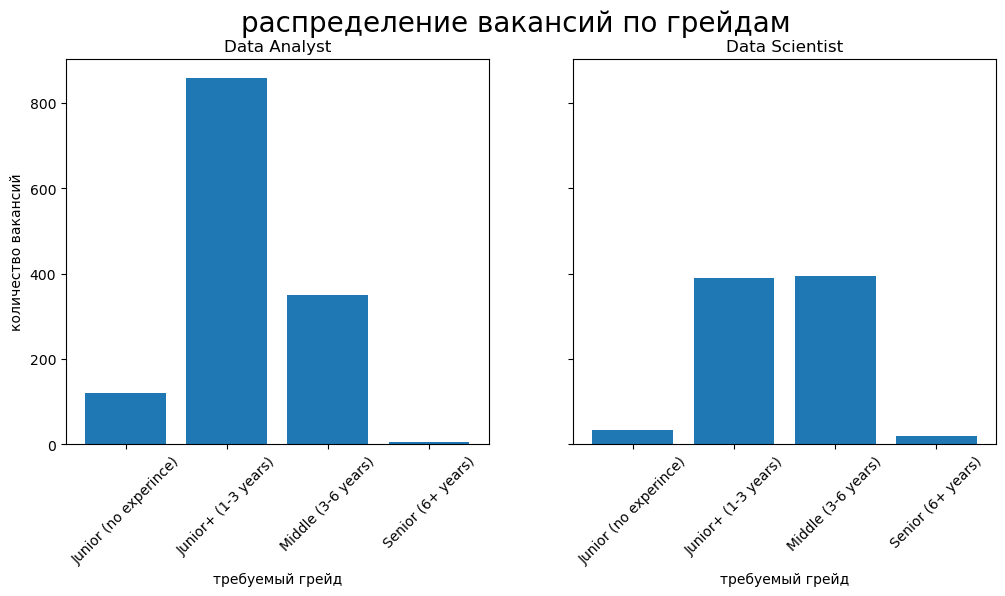

In [42]:
gr_1('experience','id','count','требуемый грейд','количество вакансий','распределение вакансий по грейдам')

По графикам выше видно, что у дата аналитиков в вакансиях грейд j+ превышает ближайший более чем в 2 раза  
Дата саентист в это же время показывает нормальное распределение (кол-во j+ и m примерно равны)

### Определение доли грейдов Junior, Junior+, Middle, Senior среди вакансий Аналитик данных и Бизнес-аналитик

In [43]:
def gr_2(a,gr,func,x,y,c,data_a=dt_da, data_s=dt_ds):

    # создадим сводные таблицы
    data_r = data_a.pivot_table(index=a, values=gr, aggfunc=func)
    data_r[a] = data_r.index
    data_r.columns = [gr,a]

    data_rs = data_s.pivot_table(index=a, values=gr, aggfunc=func)
    data_rs[a] = data_rs.index
    data_rs.columns = [gr,a]
    
    fig, ax = plt.subplots(1, 2, sharey=True, figsize=[12, 5])
    # plt.grid(True)
    plt.suptitle(c,fontsize=20)

    plt.subplot(1,2,1)
    plt.bar(data_r[a],data_r[gr]/sum(data_r[gr]))
    plt.xticks(rotation=45)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title('Data Analyst')
    # plt.grid(True)

    plt.subplot(1,2,2)
    plt.bar(data_rs[a],data_rs[gr]/sum(data_rs[gr]))
    plt.xticks(rotation=45)
    plt.xlabel(x)
    # plt.ylabel(y) 
    plt.title('Data Scientist')
    # plt.grid(True)
    
    # display(data_r,data_rs)
    plt.show()


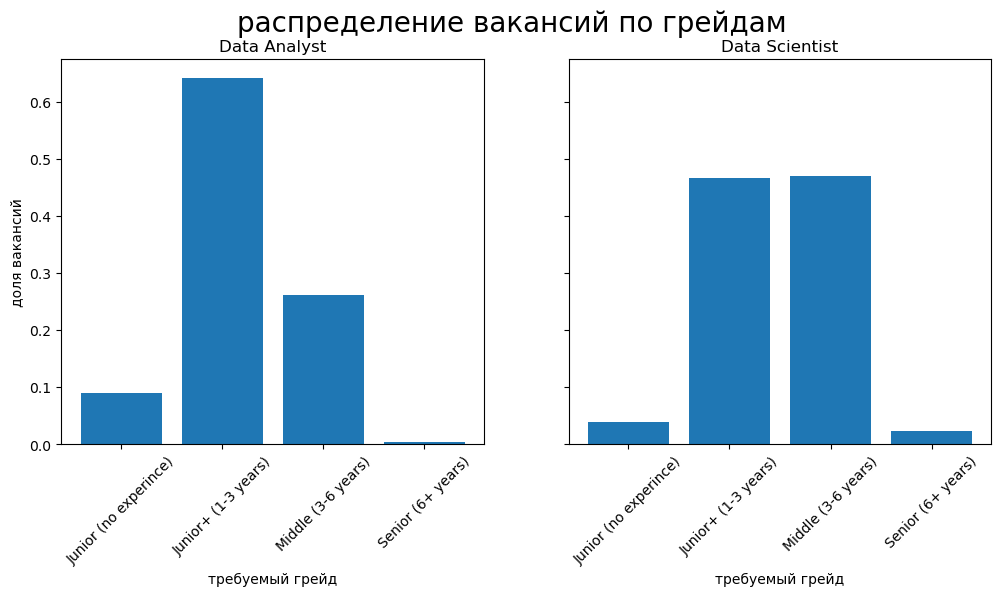

In [44]:
gr_2('experience','id','count','требуемый грейд','доля вакансий','распределение вакансий по грейдам')

### Определение типичного места работы для Аналитика данных и Бизнес-аналитика 
ТОП-работодателей по числу вакансий, зарплата, тип занятости, график работы (отдельно для грейдов Junior, Juniort, Middle, Senior).

In [45]:
def break_grade(data):
    jun = data[data['experience']=='Junior (no experince)']
    jun_pl = data[data['experience']=='Junior+ (1-3 years)']
    mid = data[data['experience']=='Middle (3-6 years)']
    sen = data[data['experience']=='Senior (6+ years)']
    return(jun,jun_pl,mid,sen)
    
def grade_mod(data,a,gr,func):
    data_r = data.pivot_table(index=a, values=gr, aggfunc=func)
    data_r[a] = data_r.index
    data_r.columns = [gr,a]
    data_r = data_r.sort_values(by=gr,ascending=False)
    data_r = data_r.head(3)
    return(data_r)
    
def plt_sub(data_r,a,gr,k,x,y):
    plt.subplot(4,2,k)
    plot = plt.barh(data_r[a],data_r[gr])
    plt.bar_label(plot,padding=-30,color='white')
    plt.yticks(rotation=45)
    plt.xlabel(x)
    plt.ylabel(y)
    if k in [1,2,3,4]: 
        plt.text(0.7*max(data_r[gr]), round(len(data_r[a].unique())/2,2)-0.5, "Data Analyst",fontsize=30,color='grey')
    if k not in [1,2,3,4]: 
        plt.text(0.7*max(data_r[gr]), round(len(data_r[a].unique())/2,2)-0.5, "Data Scientist",fontsize=30,color='grey')
    if k==1 or k ==5:
        tit = 'Junior'
    if k==2 or k==6:
        tit = 'Junior+'
    if k==3 or k==7:
        tit = 'Middle'
    if k==4 or k==8:
        tit = 'Senior'
    plt.title(tit)
# немного модернизируем функцию gr_1 для нахождения топа работадателей
def gr_top(a,gr,func,x,y,c,data_a=dt_da, data_s=dt_ds):

    # создадим сводные таблицы
    jun_a,jun_pl_a,mid_a,sen_a = break_grade(data_a)
    jun_s,jun_pl_s,mid_s,sen_s = break_grade(data_s)

    jun_a = grade_mod(jun_a,a,gr,func)
    jun_pl_a = grade_mod(jun_pl_a,a,gr,func)
    mid_a = grade_mod(mid_a,a,gr,func)
    sen_a = grade_mod(sen_a,a,gr,func)

    jun_s = grade_mod(jun_s,a,gr,func)
    jun_pl_s = grade_mod(jun_pl_s,a,gr,func)
    mid_s = grade_mod(mid_s,a,gr,func)
    sen_s = grade_mod(sen_s,a,gr,func) 

    fig, ax = plt.subplots(4, 2, sharex=True, figsize=[30, 20])
    plt.suptitle(c, fontsize=20)

    for i,e in enumerate([jun_a,jun_pl_a,mid_a,sen_a,jun_s,jun_pl_s,mid_s,sen_s]):
        plt_sub(e,a,gr,i+1,x,y)
    


    
    # display(data_r,data_rs)
    plt.show()


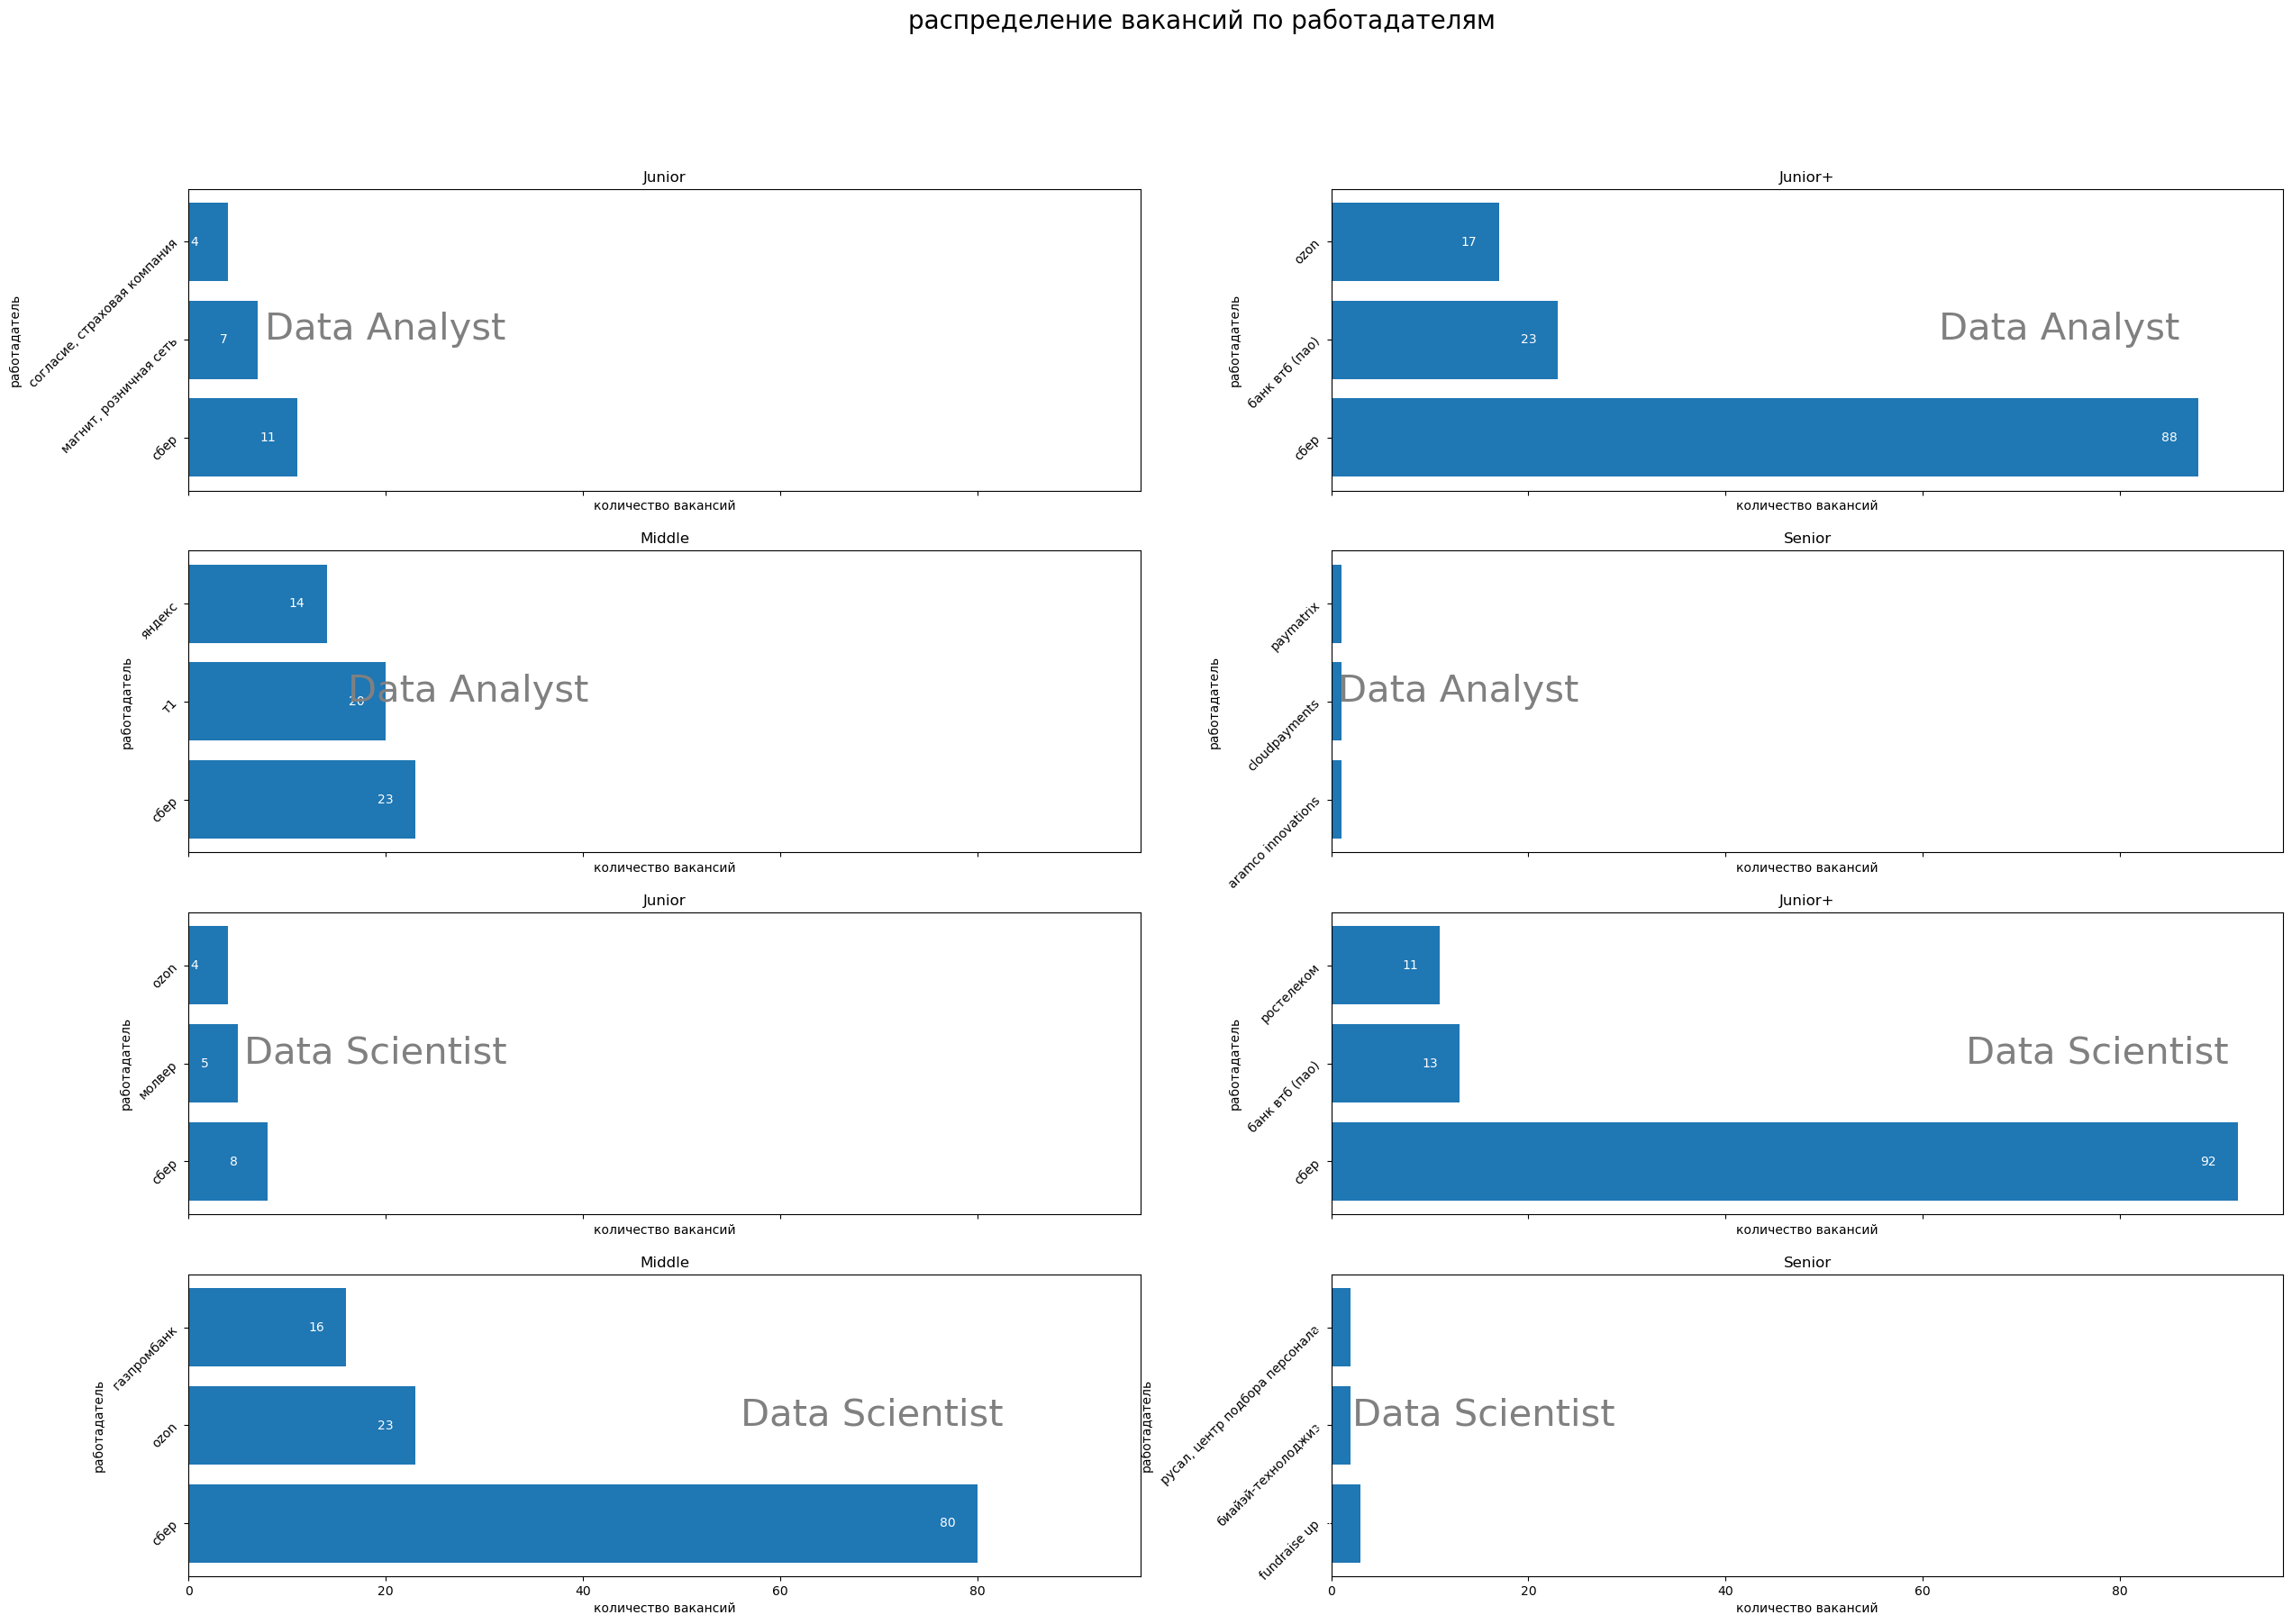

In [46]:
gr_top('employer','id','count','количество вакансий','работадатель','распределение вакансий по работадателям')

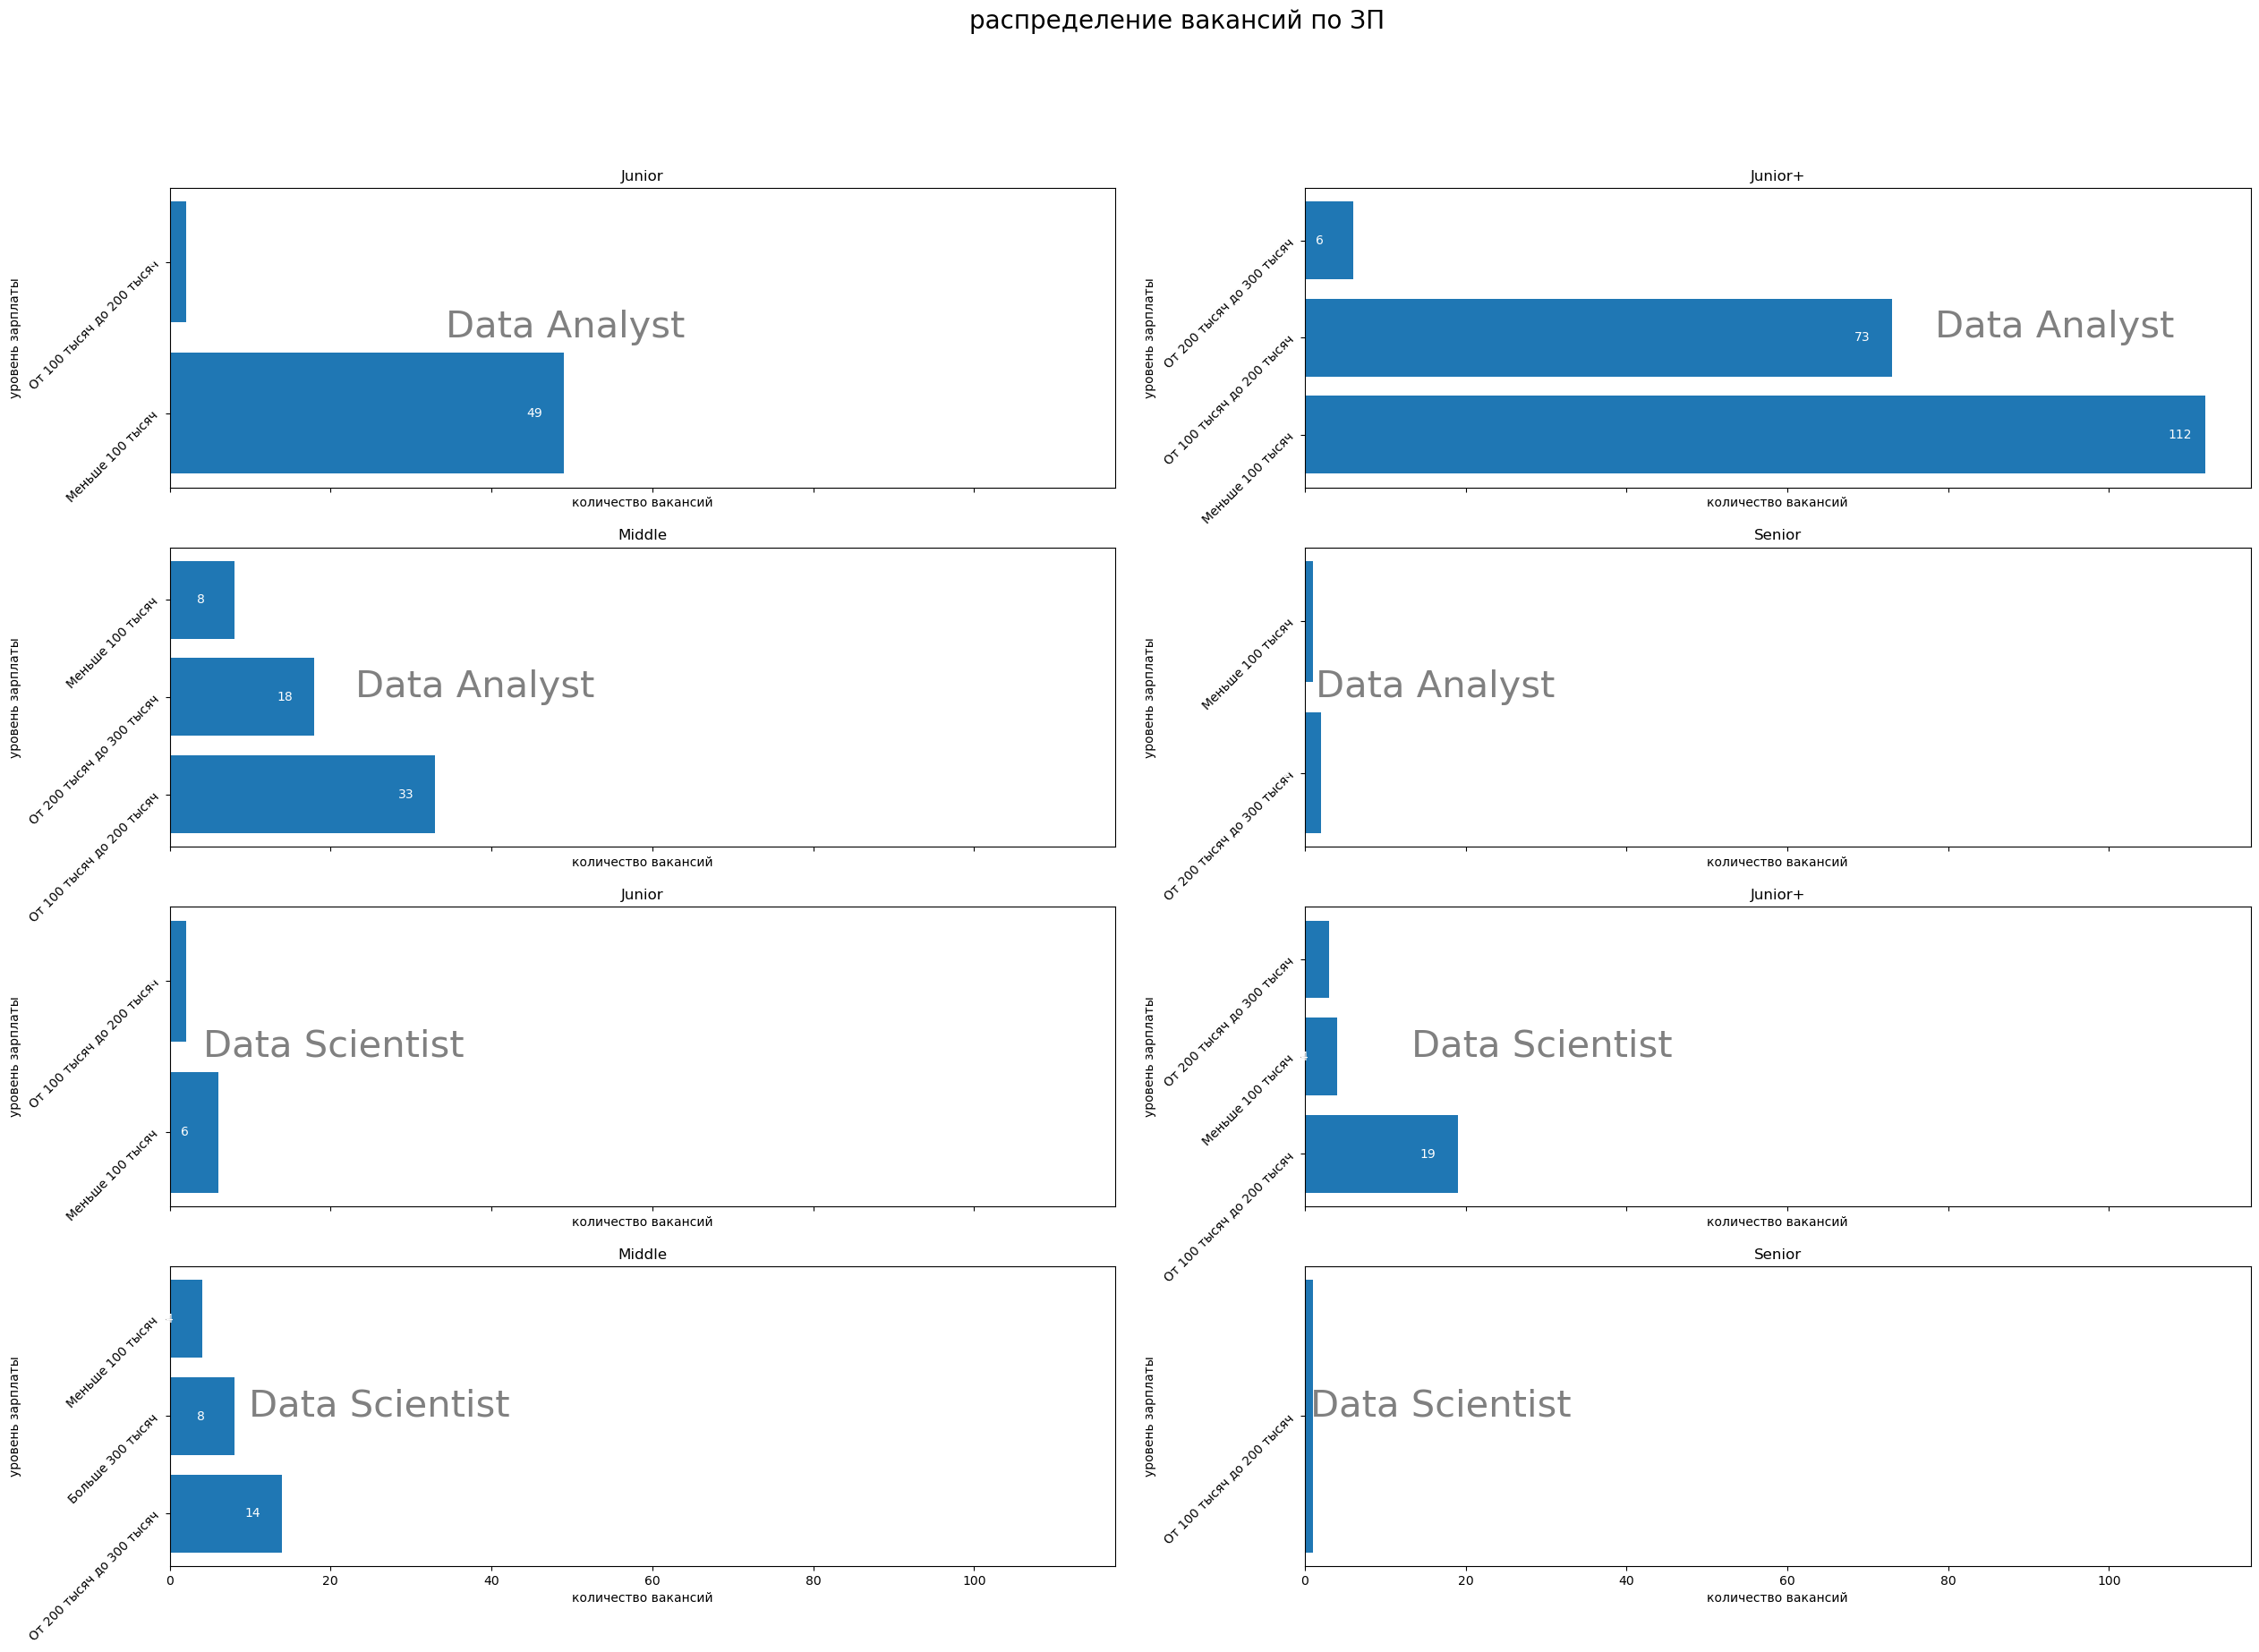

In [47]:
dt_da_z = dt_da.query('salary_bin != "ЗП не указана"')
dt_ds_z = dt_ds.query('salary_bin != "ЗП не указана"')

gr_top('salary_bin','id','count','количество вакансий','уровень зарплаты',
       'распределение вакансий по ЗП',data_a = dt_da_z,data_s = dt_ds_z)

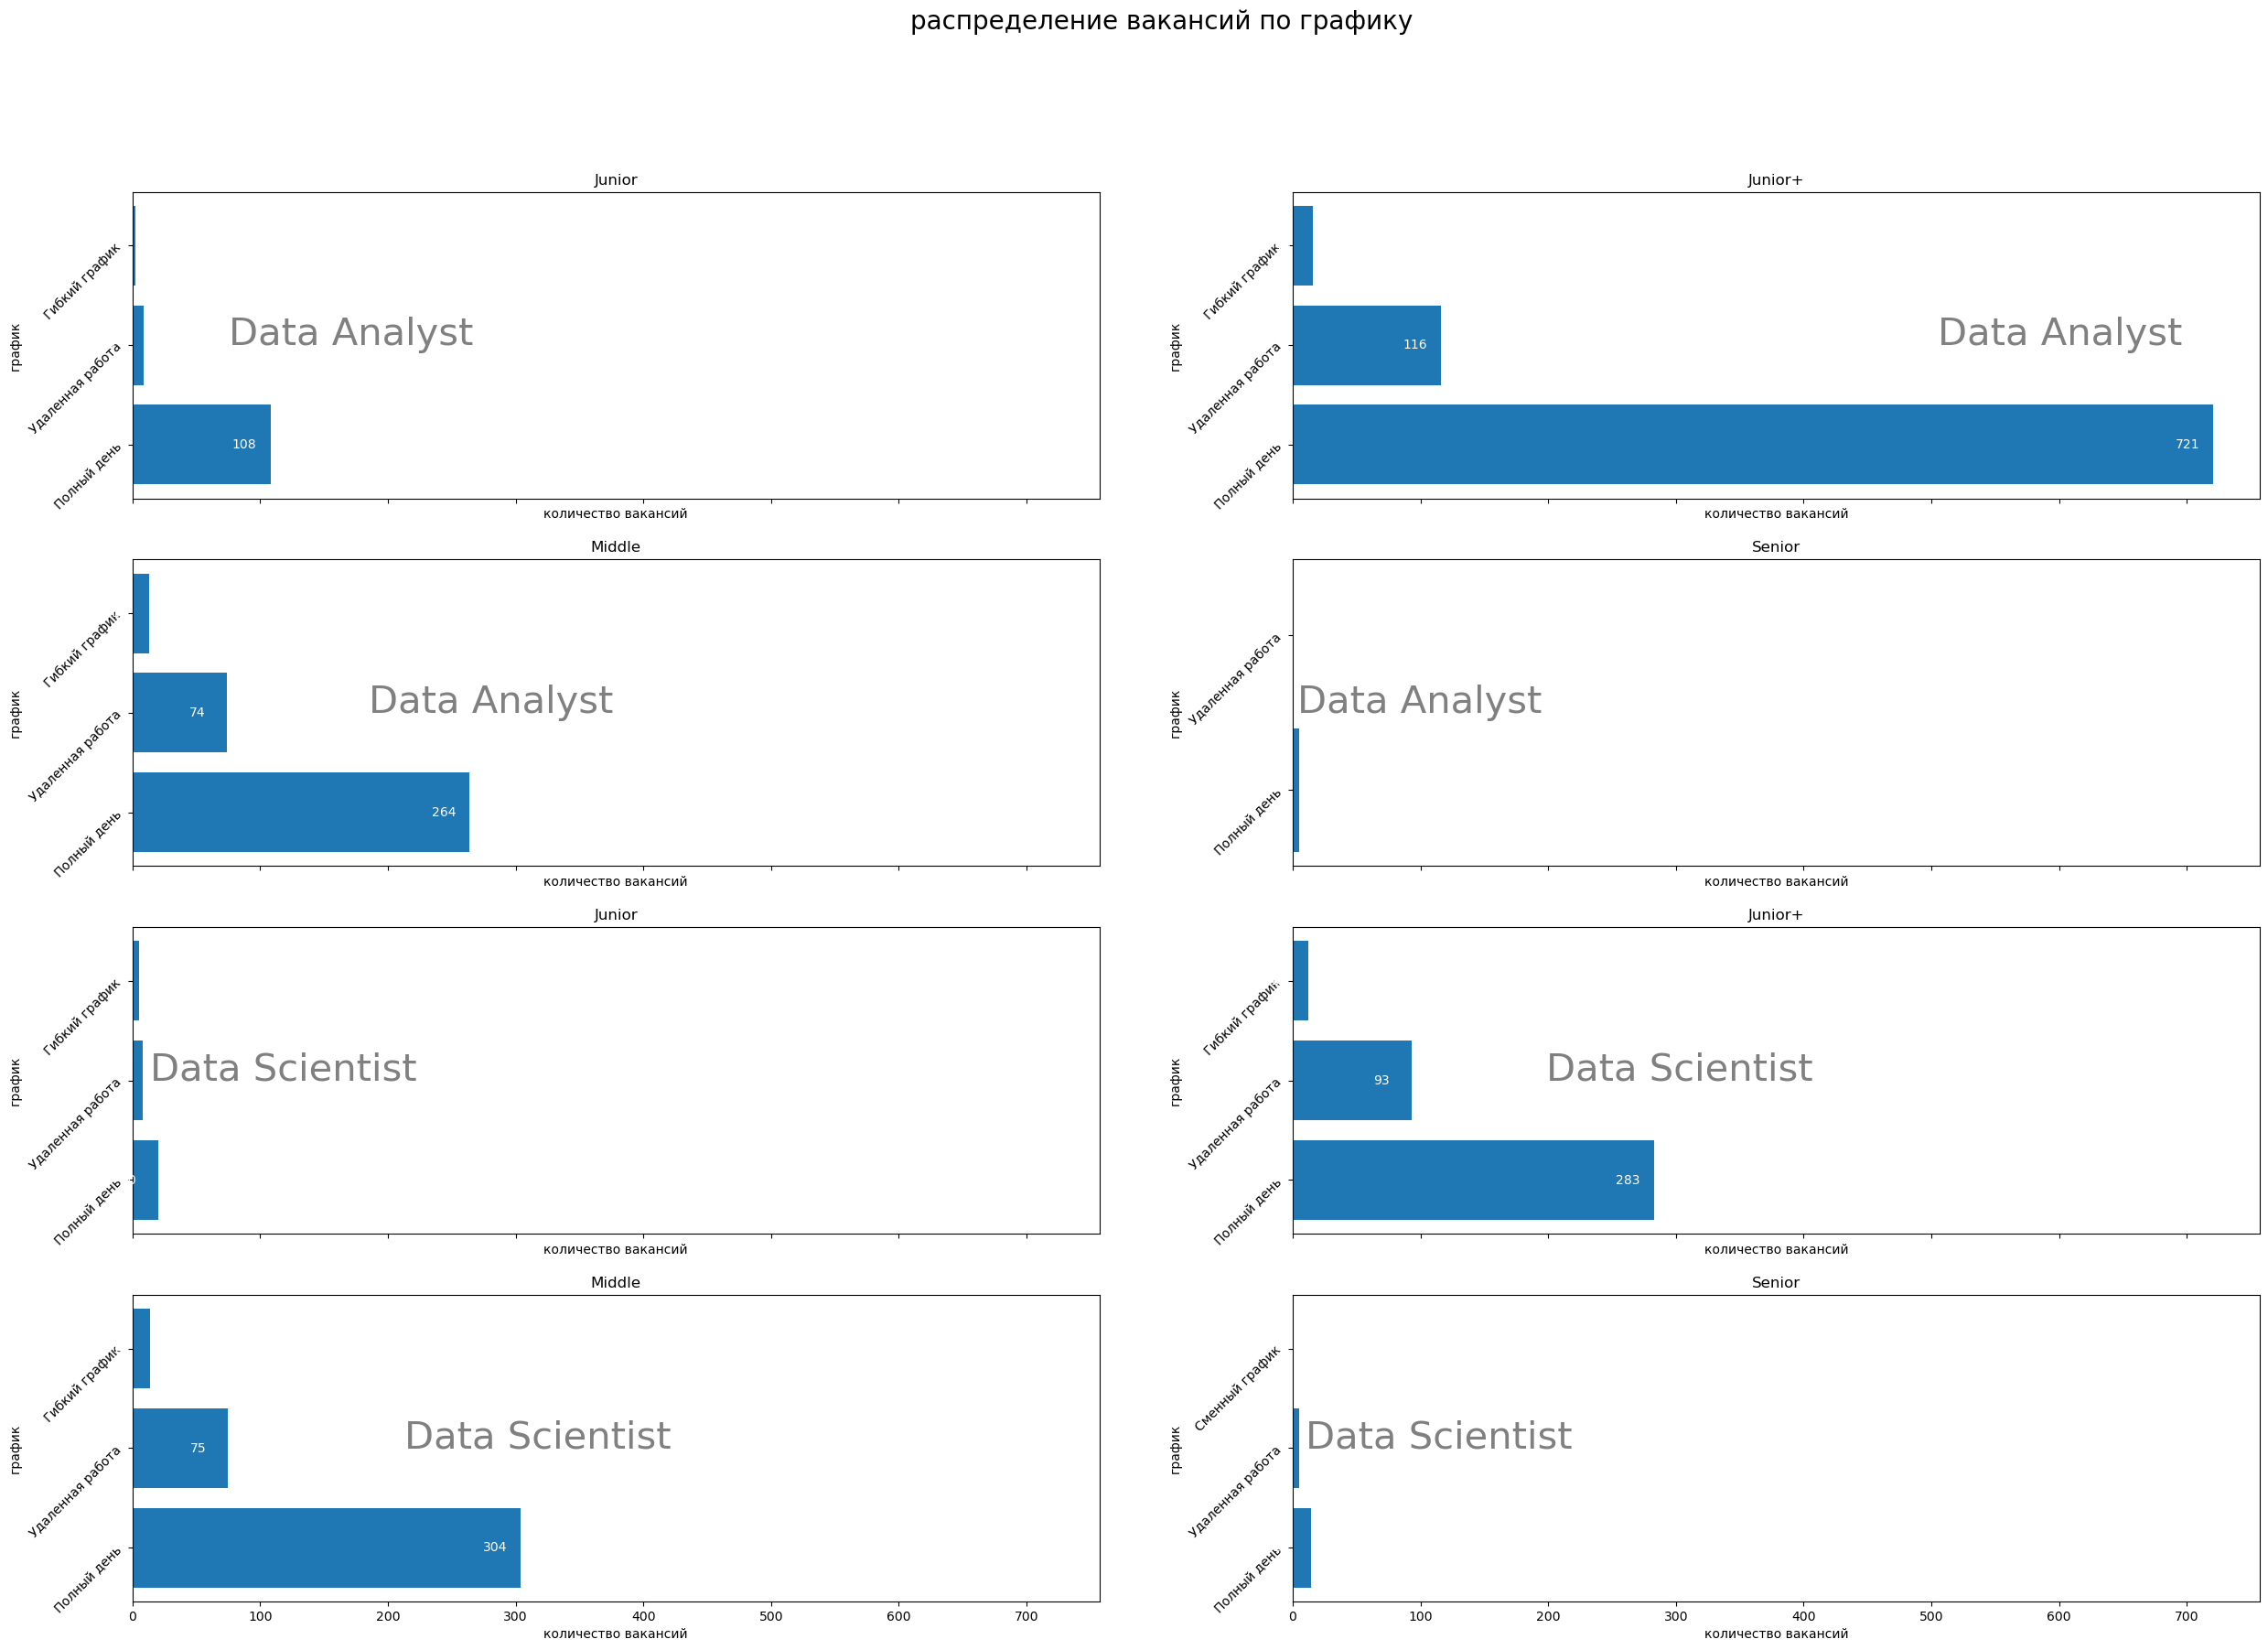

In [48]:
gr_top('schedule','id','count','количество вакансий','график','распределение вакансий по графику')

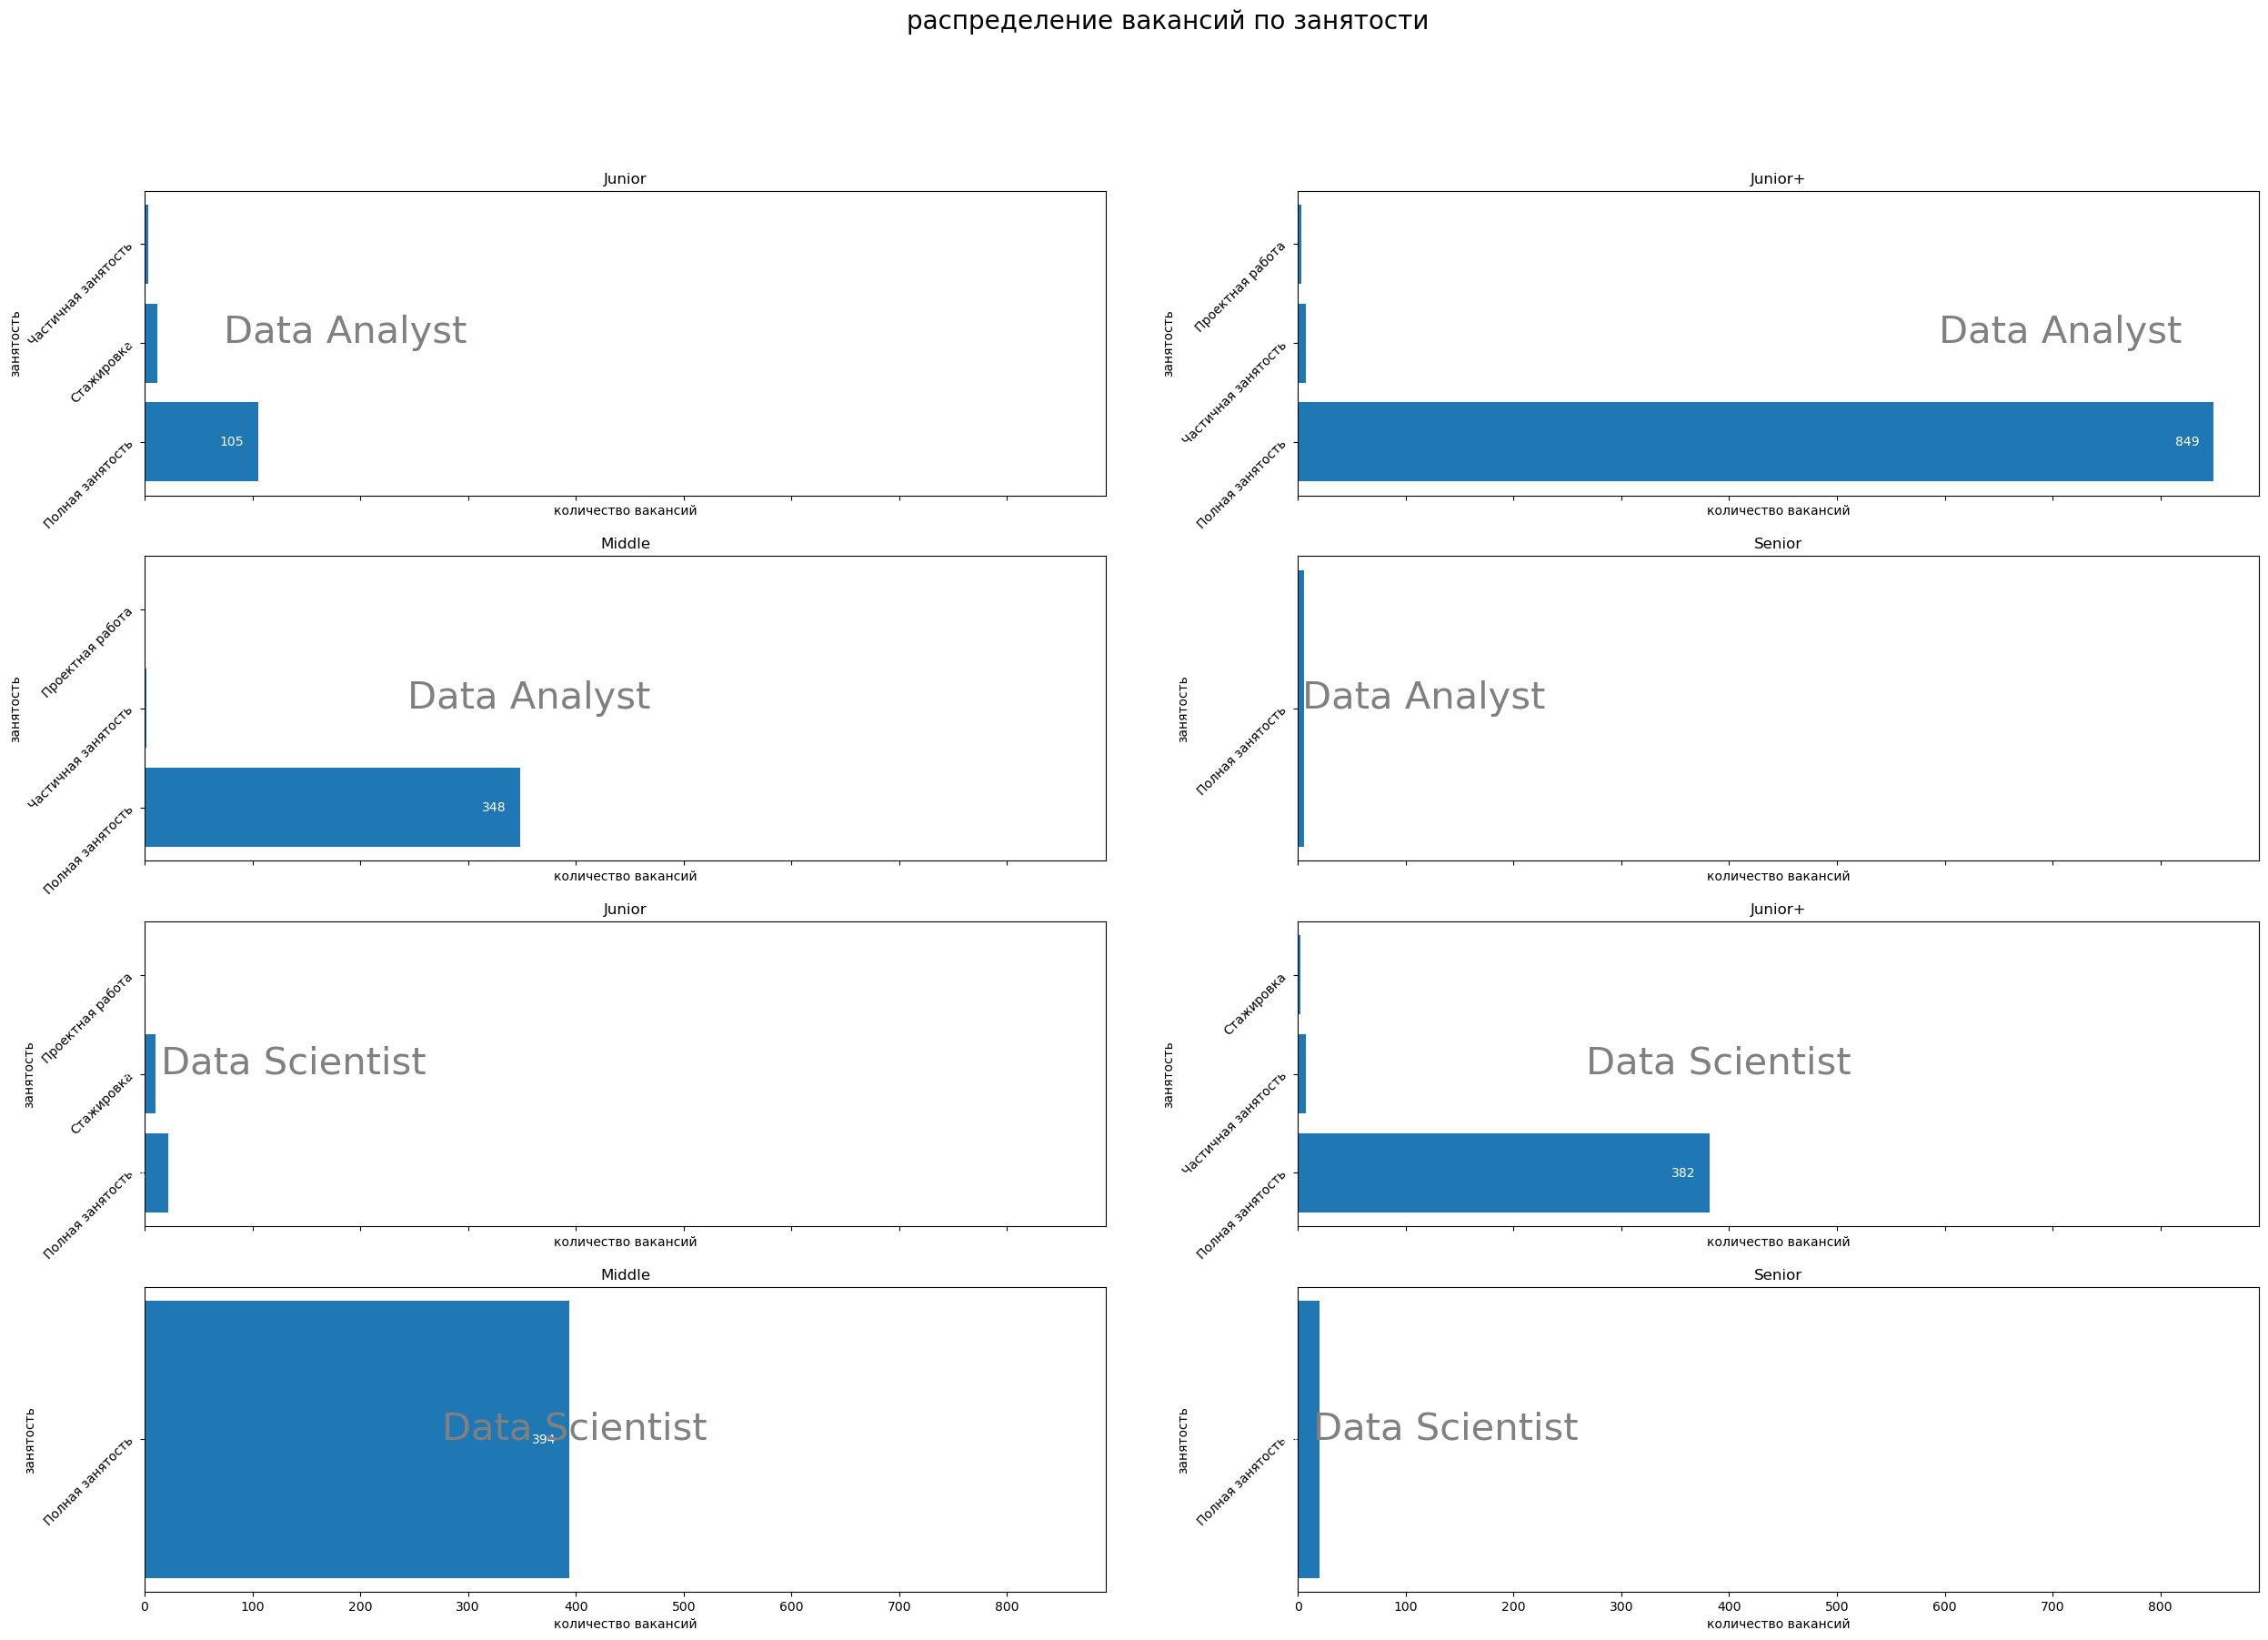

In [49]:
gr_top('employment','id','count','количество вакансий','занятость','распределение вакансий по занятости')

***
__Работадатель__  
Основными работадателями в большинстве грейдов является СБЕР, второе место делять различные IT компании

__Средняя зп__  
Средняя зп на уровне junior стабильно держится в диапазоне до 100 тыс руб    
При повышения грейда хотя бы до junior+ зп не опускается ниже 100

__График__  
Основным графиком для всех грейдов является полный рабочий день

__Условия/занятость__  
В основном все вакансии расчитаны на полную занятость соискателя

### Определение, какие навыки спрашивают чаще - твердые или мягкие. 
К какому грейду и к какой специальности требований больше.

In [50]:
dt_da['h_s'] = pd.notna(dt_da['d_key_skills'])
dt_da['s_s'] = pd.notna(dt_da['d_soft_skills'])

dt_ds['h_s'] = pd.notna(dt_ds['d_key_skills'])
dt_ds['s_s'] = pd.notna(dt_ds['d_soft_skills'])

/var/folders/gc/6bvsy3f551n69fv64czd76yr0000gn/T/ipykernel_72889/3576322467.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt_da['h_s'] = pd.notna(dt_da['d_key_skills'])
/var/folders/gc/6bvsy3f551n69fv64czd76yr0000gn/T/ipykernel_72889/3576322467.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt_da['s_s'] = pd.notna(dt_da['d_soft_skills'])
/var/folders/gc/6bvsy3f551n69fv64czd76yr0000gn/T/ipykernel_72889/3576322467.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

In [51]:
def plt_sub_1(data_r,k,x,y):
    plt.subplot(4,2,k)
    plot = plt.barh(['Hard','Soft'],[sum(data_r['h_s']),sum(data_r['s_s'])])
    plt.bar_label(plot,padding=0,color='black')
    plt.yticks(rotation=45)
    plt.xlabel(x)
    plt.ylabel(y)
    if k in [1,2,3,4]: 
        plt.text(200, 0.5, "Data Analyst",fontsize=20,color='grey')
    if k not in [1,2,3,4]: 
        plt.text(200, 0.5, "Data Scientist",fontsize=20,color='grey')    
    if k==1 or k ==5:
        tit = 'Junior'
    if k==2 or k==6:
        tit = 'Junior+'
    if k==3 or k==7:
        tit = 'Middle'
    if k==4 or k==8:
        tit = 'Senior'
    plt.title(tit)
# немного модернизируем функцию gr_1 для нахождения топа работадателей
def gr_top_1(x,y,c, data_a=dt_da, data_s=dt_ds):

    # создадим сводные таблицы
    jun_a,jun_pl_a,mid_a,sen_a = break_grade(data_a)
    jun_s,jun_pl_s,mid_s,sen_s = break_grade(data_s)

    fig, ax = plt.subplots(4, 2, sharex=True, figsize=[15, 15])
    plt.suptitle(c,fontsize=20)

    for i,e in enumerate([jun_a,jun_pl_a,mid_a,sen_a,jun_s,jun_pl_s,mid_s,sen_s]):
        plt_sub_1(e,i+1,x,y)

    plt.show()


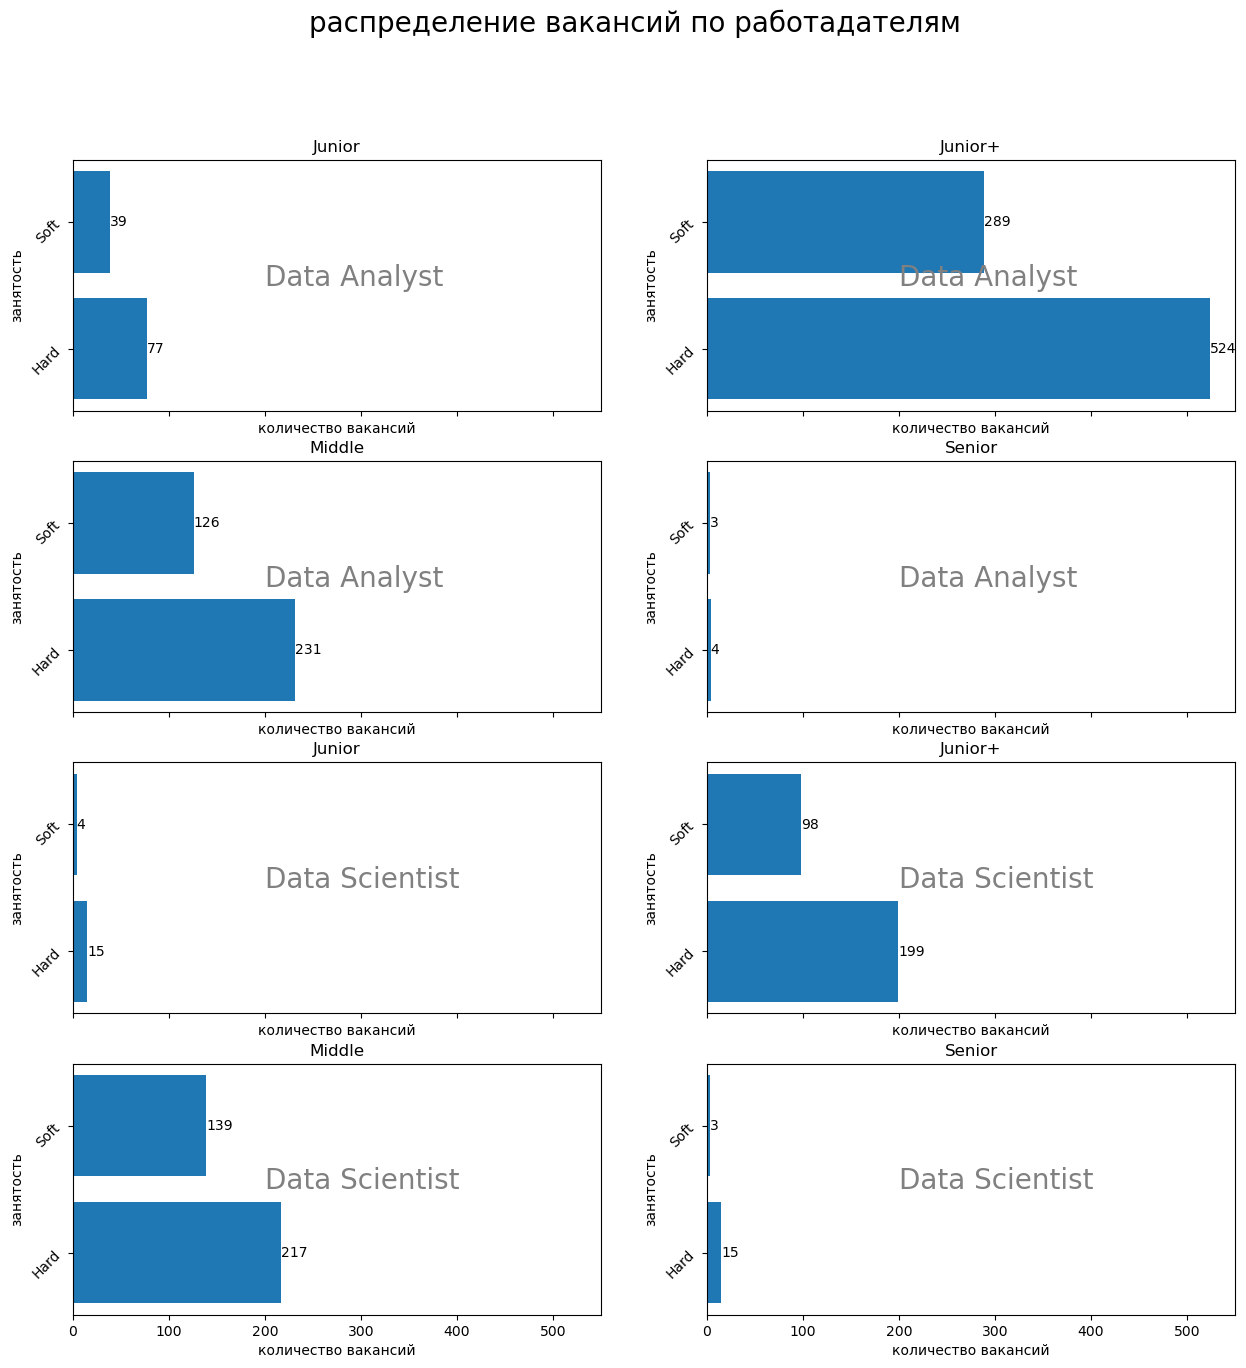

In [52]:
gr_top_1('количество вакансий','занятость','распределение вакансий по работадателям')

*** 
В основном в вакансиях указывают только hard скилы    
В каждой второй вакансии для самого желаемого грейда junior+ указаны только hard скилы

### Определение наиболее желаемых кандидатов на вакансии Аналитик данных и Бизнес-аналитик 
самые важные hard-skils, самые важные soft-skils.

In [53]:
# Функция для замены неявных значений в столбце key_skills
def uni_skills(unique_skills):
    for i,e in enumerate(unique_skills):
        # перевод строк в ячейках в нижный регистр
        unique_skills[i] = unique_skills[i].lower()
        unique_skills[i] = unique_skills[i].replace(':','')
        unique_skills[i] = unique_skills[i].replace('-','')
        unique_skills[i] = unique_skills[i].replace('- ','')
        unique_skills[i] = unique_skills[i].replace('/','')
        unique_skills[i] = unique_skills[i].replace('\uf02d ','')
        unique_skills[i] = unique_skills[i].replace('\\','')

        # создание кортежей для замены
        pr_1c = ('1c','1с')
        pr_ab = ('автес','ab','абх тесты')
        pr_ai = ('ai','al')
        pr_zk = ('199и','223фз','3624у', '44фз', '483п','646п')
        pr_dl = ('data l','datal')
        pr_en = ('english','английский')
        pr_pd = ('pandas','pd','владение pandas')
        pr_mtplt = ('matlib','mathpl','matplo','matolib')
        pr_ms = ('ms', 'excel', 'power point', 'word','ехсеl','powerpoint')
        pr_ya = ('yandex', 'яндекс')
        pr_nn = ('нейро')

        if unique_skills[i].startswith(pr_zk):
            unique_skills[i] = 'Знание определенных законов'
        if unique_skills[i].startswith(pr_1c) or unique_skills[i].endswith(pr_1c):
            unique_skills[i] = '1C'
        if unique_skills[i].startswith(pr_ab):
            unique_skills[i] = 'A/B'
        if unique_skills[i].startswith('anaconda'):
            unique_skills[i] = 'Anaconda'            
        if unique_skills[i].startswith('agile') or unique_skills[i].endswith('agile'):
            unique_skills[i] = 'Agile'  
        if unique_skills[i].startswith('ad'):
            unique_skills[i] = 'Ad-Hoc'
        if unique_skills[i].startswith('air'):
            unique_skills[i] = 'Air Flow'  
        if unique_skills[i].startswith(pr_ai):
            unique_skills[i] = 'AI' 
        if unique_skills[i].startswith('apache'):
            unique_skills[i] = 'Apache' 
        if unique_skills[i].startswith('bim'):
            unique_skills[i] = 'BIM'
        if unique_skills[i].startswith('big'):
            unique_skills[i] = 'BigQuery'
        if unique_skills[i].startswith('bi') or unique_skills[i].endswith(' bi'):
            unique_skills[i] = 'BI'
        if unique_skills[i].startswith(('jupyter','jupiter')):
            unique_skills[i] = 'Jupyter Notebook'  
        if unique_skills[i].startswith('google'):
            unique_skills[i] = 'Инструменты Google'
        if unique_skills[i].startswith('aren'):
            unique_skills[i] = 'Arenadata'
        if unique_skills[i].startswith('atlassian'):
            unique_skills[i] = 'Atlassian'    
        if unique_skills[i].startswith('computer'):
            unique_skills[i] = 'Computer Vision'
        if unique_skills[i].startswith('greenpl'):
            unique_skills[i] = 'Green PLum'    
        if unique_skills[i].endswith('++'):
            unique_skills[i] = 'C++'    
        if unique_skills[i].startswith('data an'):
            unique_skills[i] = 'Data Analyst'
        if unique_skills[i].startswith('data sc'):
            unique_skills[i] = 'Data Science'
        if unique_skills[i].startswith('confluence'):
            unique_skills[i] = 'Confluence'    
        if unique_skills[i].startswith(pr_dl):
            unique_skills[i] = 'Data Lense'
        if unique_skills[i].startswith('sql') or unique_skills[i].endswith('sql'):
            unique_skills[i] = 'SQL'
        if unique_skills[i].startswith('elastic'):
            unique_skills[i] = 'Elastic'
        if unique_skills[i].startswith(pr_en):
            unique_skills[i] = 'Английский язык'
        if unique_skills[i].startswith(pr_ms) or unique_skills[i].endswith(pr_ms):
            unique_skills[i] = 'Инструменты MS'
        if unique_skills[i].startswith('erp'):
            unique_skills[i] = 'ERP'  
        if unique_skills[i].startswith(pr_pd):
            unique_skills[i] = 'Pandas'
        if unique_skills[i].startswith(pr_mtplt):
            unique_skills[i] = 'MathPlot'
        if unique_skills[i].startswith(('ml','machine learning')) or unique_skills[i].endswith('ml'):
            unique_skills[i] = 'ML'
        if unique_skills[i].startswith('json'):
            unique_skills[i] = 'Json'
        if unique_skills[i].startswith('oracle'):
            unique_skills[i] = 'Oracle'
        if unique_skills[i].startswith('teradata'):
            unique_skills[i] = 'Teradata'
        if unique_skills[i].startswith('llama'):
            unique_skills[i] = 'Llama'
        if unique_skills[i].startswith('алгоритмы'):
            unique_skills[i] = 'Алгоритмы'    
        if unique_skills[i].startswith('olap') or unique_skills[i].endswith('olap'):
            unique_skills[i] = 'Olap'
        if unique_skills[i].startswith('грамотн'):
            unique_skills[i] = 'Грамотная речь и письмо'
        if unique_skills[i].startswith(pr_ya):
            unique_skills[i] = 'Инструменты Яндекс' 
        if unique_skills[i].startswith(pr_nn):
            unique_skills[i] = 'Нейронные сети'
        if unique_skills[i].startswith(('dock','doc','dok')):
            unique_skills[i] = 'Docker'
    list = sorted(set(unique_skills))
    return(list)

In [54]:
# Получим список уникальных значений хард скилов
list_l = []

for i,v in enumerate(dt['key_skills']):
    v = v.split(", ")
    list_l.extend(v)

a = len(set(list_l))
unique_skills = set(list_l)
unique_skills = sorted(unique_skills)
unique_skills.remove('не указано')
unique_skills = uni_skills(unique_skills)

c = (a - len(unique_skills)) * 100
d = round(c/a, 1)
print('Исходный пул уникальных навыков уменьшился на :', d , '%')


Исходный пул уникальных навыков уменьшился на : 25.5 %


In [55]:
# будем проходить по столбцу key_skills
# искать совпадения с уникальными значениями, предварительно обрабатывая значения функцией uni_skills
# и записывать количество таких совпадений для каждого значения

# для DA
hard_sk_list =[]
for i in unique_skills:
    hs = 0
    for j in dt_da['key_skills']:
        s_list = j.split(", ")
        s_list = uni_skills(s_list)
        if i in s_list:
            hs = hs+1
    hard_sk_list.append(hs)

# для DS
hard_sk_list_s =[]
for i in unique_skills:
    hs = 0
    for j in dt_ds['key_skills']:
        s_list = j.split(", ")
        s_list = uni_skills(s_list)
        if i in s_list:
            hs = hs+1
    hard_sk_list_s.append(hs)


In [56]:
df_hard_da = pd.DataFrame({'key_skill': unique_skills, 'count':hard_sk_list})
df_hard_ds = pd.DataFrame({'key_skill': unique_skills, 'count':hard_sk_list_s})

df_hard_da = df_hard_da.sort_values(by='count',ascending=False)
df_hard_ds = df_hard_ds.sort_values(by='count',ascending=False)

df_hard_da = df_hard_da.head()
df_hard_ds = df_hard_ds.head()

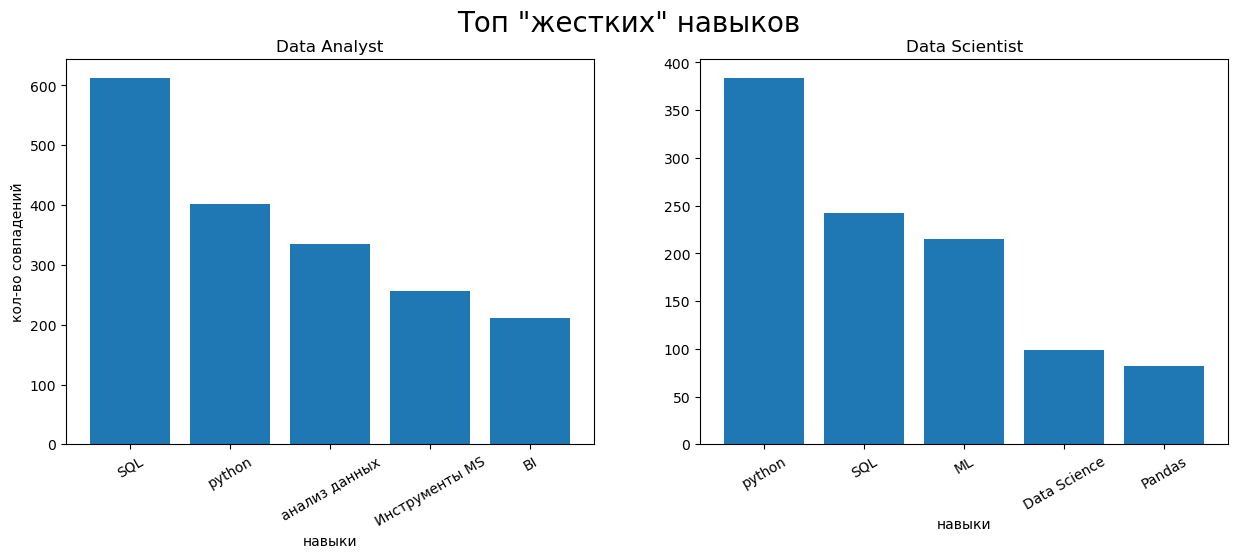

In [57]:
# построим график для хард скилов
fig, ax = plt.subplots(1, 2, figsize=[15, 5])
plt.suptitle('Топ "жестких" навыков', fontsize=20)
x = 'кол-во совпадений'
plt.subplot(1,2,1)
plt.bar(df_hard_da['key_skill'],df_hard_da['count'])
plt.xticks(rotation=30)
plt.ylabel(x)
plt.xlabel('навыки')
plt.title('Data Analyst')
# plt.grid(True)

plt.subplot(1,2,2)
plt.bar(df_hard_ds['key_skill'],df_hard_ds['count'])
plt.xticks(rotation=30)
# plt.ylabel(x)
plt.xlabel('навыки') 
plt.title('Data Scientist')
# plt.grid(True)

plt.show()

In [58]:
# Получим список уникальных значений софт скилов
list_ls = []
dt_ss = dt.copy()

for i,v in enumerate(dt_ss['soft_skills']):
    v = v.split(", ")
    list_ls.extend(v)

unique_soft_skills = set(list_ls)
unique_soft_skills = sorted(unique_soft_skills)
unique_soft_skills.remove('не указано')
unique_soft_skills

['Адаптивность',
 'Аналитическое мышление',
 'Внимание к деталям',
 'Документация',
 'Коммуникация',
 'Креативность',
 'Лидерство',
 'Переговоры',
 'Письменная коммуникация',
 'Презентация результатов',
 'Принятие решений',
 'Проактивность',
 'Работа в команде',
 'Решение проблем',
 'Тайм-менеджмент']

In [59]:
# будем проходить по столбцу soft_skills
# искать совпадения с уникальными значениями
# и записывать количество таких совпадений для каждого значения

# для DA
soft_sk_list =[]
for i in unique_soft_skills:
    ss = 0
    for j in dt_da['soft_skills']:
        s_list = j.split(", ")
        if i in s_list:
            ss = ss+1
    soft_sk_list.append(ss)

# для DS
soft_sk_list_s =[]
for i in unique_soft_skills:
    ss = 0
    for j in dt_ds['soft_skills']:
        s_list = j.split(", ")
        if i in s_list:
            ss = ss+1
    soft_sk_list_s.append(ss)

df_soft_da = pd.DataFrame({'soft_skill': unique_soft_skills, 'count':soft_sk_list})
df_soft_ds = pd.DataFrame({'soft_skill': unique_soft_skills, 'count':soft_sk_list_s})

df_soft_da = df_soft_da.sort_values(by='count',ascending=False)
df_soft_ds = df_soft_ds.sort_values(by='count',ascending=False)

df_soft_da = df_soft_da.head()
df_soft_ds = df_soft_ds.head()

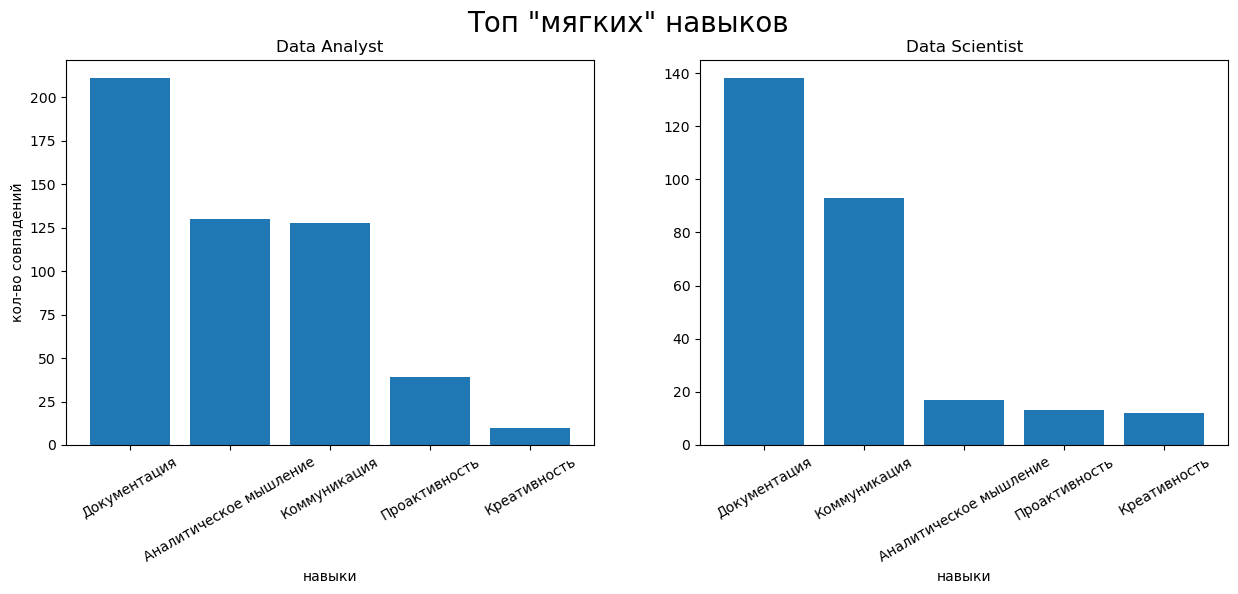

In [60]:
# построим график для софт скилов
fig, ax = plt.subplots(1, 2, figsize=[15, 5])
plt.suptitle('Топ "мягких" навыков', fontsize=20)
x = 'кол-во совпадений'
plt.subplot(1,2,1)
plt.bar(df_soft_da['soft_skill'],df_soft_da['count'])
plt.xticks(rotation=30)
plt.ylabel(x)
plt.xlabel('навыки')
plt.title('Data Analyst')
# plt.grid(True)

plt.subplot(1,2,2)
plt.bar(df_soft_ds['soft_skill'],df_soft_ds['count'])
plt.xticks(rotation=30)
# plt.ylabel(x)
plt.xlabel('навыки') 
plt.title('Data Scientist')
# plt.grid(True)

# display(data_r,data_rs)
plt.show()

***
Наиболее важными "жесткими" навыками для аналитика данных являеется знание Python и SQL, а также умении анализировать данные   
Для бизнес аналитика такими навыиками являются также Python и SQL, а также machine learning   

Основные мягкие навыки для специальностей совпадают: знать и уметь работать с документацией, коммуникация и аналитический склад ума

### Расчет помесячной динамики количества вакансий для Аналитика данных и Бизнес-аналитика.

In [61]:
dt_da['month'] =  pd.to_datetime(dt_da['published_at']).dt.month
dt_ds['month'] =  pd.to_datetime(dt_ds['published_at']).dt.month

/var/folders/gc/6bvsy3f551n69fv64czd76yr0000gn/T/ipykernel_72889/3065738640.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt_da['month'] =  pd.to_datetime(dt_da['published_at']).dt.month
/var/folders/gc/6bvsy3f551n69fv64czd76yr0000gn/T/ipykernel_72889/3065738640.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt_ds['month'] =  pd.to_datetime(dt_ds['published_at']).dt.month


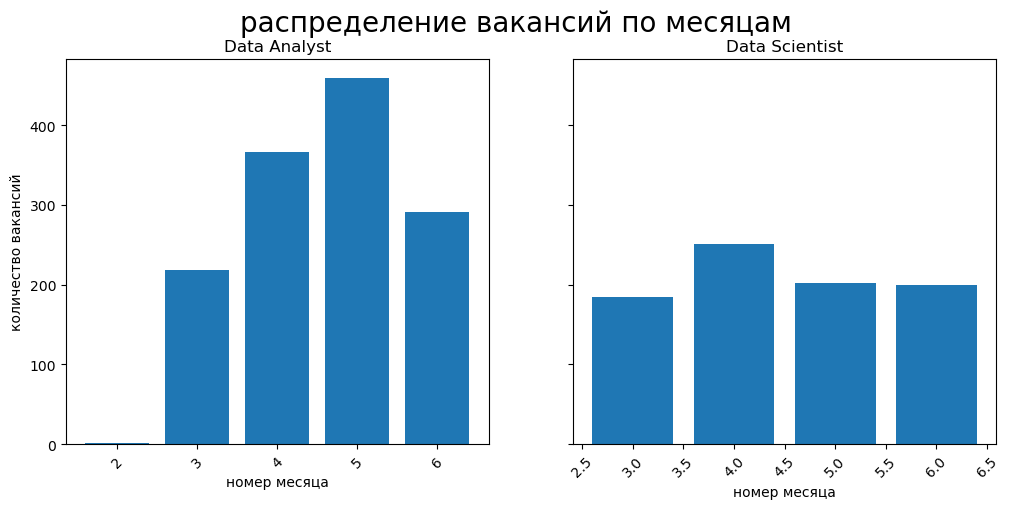

In [62]:
gr_1('month','id','count','номер месяца','количество вакансий','распределение вакансий по месяцам')

В целом для бизнес аналитиков наличие свежих вакансий это постоянное число (около 200)  
Аналитиков данных ищут больше, и количество новых вакансий может отличаться месяц к месяцу в 2 раза

## Выводы

В ходе данного проекта выполнены следующие задачи
- Произведена __предобработка данных:__
    - Проверены типы данных
    - Для удобства переименованы некоторые столбцы
    - Обработаны явные и неявные дубликаты(обработка неявных дубликатов также производится в п 4.5)
    - Пропуски в данных заполнены подходящими значениями или заглушками, либо данные удалены
- Произведен __исследовательсикй анализ данных:__
    - В ходе анализа ликвидированы выбросы и подтвержена 'чистота' данных
- В ходе __основной части исследования:__
    - Был выявлен самый актуальный грейд в вакансиях:
        - По графикам выше видно, что у дата аналитиков в вакансиях грейд j+ превышает ближайший более чем в 2 раза
        - Бизнес аналитик в это же время показывает нормальное распределение (кол-во j+ и m примерно равны)
    - Определены основные параметры предложенных вакансий:
        - __Работадатель__  
            - Основными работадателями в большинстве грейдов является СБЕР, второе место делять различные IT компании
        - __Средняя зп__  
            - Средняя зп на уровне junior стабильно держится в диапазоне до 100 тыс руб    
            - При повышения грейда хотя бы до junior+ зп не опускается ниже 100
        - __График__  
            - Основным графиком для всех грейдов является полный рабочий день
        - __Условия/занятость__  
            - В основном все вакансии расчитаны на полную занятость соискателя
    - Была выявлена относительная важность мягких скилов к жестким:
        - В основном в вакансиях указывают только hard скилы
        - В каждой второй вакансии для самого желаемого грейда junior+ указаны только hard скилы
    - Были выявлены самые важные мягкие и жесткие скилы:
        - Наиболее важными "жесткими" навыками для аналитика данных являеется знание Python и SQL, а также умении анализировать данные   
        - Для бизнес аналитика такими навыиками являются также Python и SQL, а также machine learning   
        - Основные мягкие навыки для специальностей совпадают: знать и уметь работать с документацией, коммуникация и аналитический склад ума
    - Определена помесячная динамика размещения новых вакансий
        - В целом для бизнес аналитиков наличие свежих вакансий это постоянное число (около 200)  
        - Аналитиков данных ищут больше, и количество новых вакансий может отличаться месяц к месяцу в 2 раза
***
Таким образом, средней вакансией является работа аналитика данных(чуть менее вероятно бизнес-аналитика) junior+ в СБЕРе на полный рабочий день в условиях полной занятости с зп выше 100к. Необходимыми навыками являются знание python,sql и анализа данных(или ml), а также знание документации, коммуникация и аналитический склад ума